# Classification Machine Learning Model

This notebook reads a data file created through a previous ETL process and applies a classification machine learning model to determine, from an image, if the image is "Male", "Female" or "Other" ("Alien", "Ape" or "Zombie"). 

The ETL process is contained in the notebook:

* Crypto_Punks_ETL_FINAL.ipynb

Note: Please refer to the project ERD for details on the data tables and structures.

In [1]:
# Import Dependencies

import os
import sqlite3 # NOT NEEDED
import requests # NOT NEEDED FOR THE MOMENT
import json

# Import MongoDB libraries for database management 
import pymongo # NOT NEEDED
from pymongo import MongoClient # NOT NEEDED

# Import data manipulation libraries
import numpy as np
import pandas as pd
import random

# Import machine learning libraries
from scipy.optimize import curve_fit #NOT NEEDED FOR THE MOMENT
from scipy.special import zeta # NOT NEEDED FOR THE MOMENT

# Import image and plotting libraries
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap

#Import the Machine Learning libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical #NOT NEEDED FOR THE MOMENT
import sklearn as skl

plt.style.use('fivethirtyeight')

## Read the Data File

In [2]:
# Import the machine learning dataframe file

In [3]:
machine_learning_df = pd.read_csv("Data/machine_learning.csv")
machine_learning_df.head()

,punk_id,type,accessories,type_ML,glasses_ML
0,0,Female,"['Green Eye Shadow', 'Earring', 'Blonde Bob']",1,0
1,1,Male,"['Smile', 'Mohawk']",0,0
2,2,Female,['Wild Hair'],1,0
3,3,Male,"['Wild Hair', 'Nerd Glasses', 'Pipe']",0,1
4,4,Male,"['Big Shades', 'Wild Hair', 'Earring', 'Goat']",0,1


In [4]:
# Create a list for the target type classifications
type_classification = ["Male","Female","Other"]

## Inspect the Shape of a Random Bit Map Array

In [5]:
id = random.randint(0,9999)

# set the fillename based on that id
file_to_open = ("data/images/"+str(id)+".png")
    
# Read the RGB image for that id
rgb_image = Image.open(file_to_open)

# Convert the image to a bit array
rgb_bit_map = np.asarray(rgb_image)

# Inspect the shape of the array
rgb_bit_map.shape

(24, 24, 4)

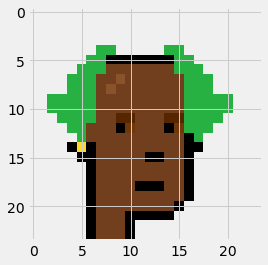

In [6]:
# Plot the RGB image
img = plt.imshow(rgb_bit_map)

## Add Image Bit Map Array for each Punk_ID

In [7]:
######################################################################
# Loop through the punk_ids, search for the corresponding image file, 
# convert the file to a bit map array, and store the array as a new 
# field in the crypto_punks_df
######################################################################

In [8]:
# Create empty lists to store the machine learning and bitmap data
machine_learning_list = []
image_bitmap_list =[]

In [9]:
for i in range(10000):
    punk_id = i
    type_ML = machine_learning_df.loc[i, "type_ML"]
    
    glasses_ML = machine_learning_df.loc[i, "glasses_ML"]
    
    file_to_open = ("Data/images/"+str(i)+".png")
    rgb_image = Image.open(file_to_open)
    
    # Convert the image to a bitmap array
    rgb_bit_map = np.asarray(rgb_image)
    
    # Add the punk_id and bitmap array to the image_bitmap_list as
    # a dictionary
    image_bitmap_list.append({"punk_id": punk_id, 
                              "image_bitmap": rgb_bit_map
                             })
    
    # Normalize the bitmap array for use by the Machine Learning model
    norm_rgb_bit_map = rgb_bit_map / 255
    
    # Add the new data to the dictionary
    machine_learning_list.append({"punk_id": punk_id,
                                  "type_ML": type_ML,
                                  "glasses_ML": glasses_ML,
                                  "normalized_bitmap": norm_rgb_bit_map
                                 })
    

In [10]:
# Inspect the bitmap list
image_bitmap_list

[{'punk_id': 0,
  'image_bitmap': array([[[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]],
  
         [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]],
  
         [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]],
  
         [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]],
  
         [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
 

In [11]:
# Inspect the machine learning list
machine_learning_list

[{'punk_id': 0,
  'type_ML': 1,
  'glasses_ML': 0,
  'normalized_bitmap': array([[[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          ...,
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],
  
         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          ...,
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],
  
         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          ...,
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],
  
         ...,
  
         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          ...,
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],
  
         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          ...,
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
        

In [12]:
print(len(image_bitmap_list))

10000


In [13]:
print(len(machine_learning_list))

10000


## Machine Learning Model - MAKE A CLASSIFICATION PREDICTION (IS MALE, FEMALE OR OTHER)

In [14]:
#Import the libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical #NOT NEEDED FOR THE MOMENT
import sklearn as skl

plt.style.use('fivethirtyeight')

In [15]:
# Create a list of the target training data
X_list =[]
y_list =[]

for i in range(len(machine_learning_list)):
    X_list.append(machine_learning_list[i]["normalized_bitmap"])
    y_list.append([machine_learning_list[i]["type_ML"]])

In [16]:
#DECLARE X and Y variables as np.arrays
X = np.asarray(X_list)
y = np.asarray(y_list)

In [17]:
print(X.shape)
print(y.shape)

(10000, 24, 24, 4)
(10000, 1)


In [18]:
# Inspect X
X

array([[[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        ...,

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
 

In [19]:
# Inspect y
y

array([[1],
       [0],
       [1],
       ...,
       [2],
       [1],
       [1]])

In [20]:
#get the shape of the arrays
print(X.shape, y.shape)

(10000, 24, 24, 4) (10000, 1)


In [21]:
# Use sklearn to split dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [22]:
# Get the shape of the arrays
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (7500, 24, 24, 4)
y_train shape: (7500, 1)
X_test shape: (2500, 24, 24, 4)
y_test shape: (2500, 1)


In [23]:
# Inspect the X_train data
X_train

array([[[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        ...,

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
 

In [24]:
# Inspect the y_train data
y_train

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [25]:
print(X_train.dtype)
print(y_train.dtype)
print(X_test.dtype)
print(y_test.dtype)

float64
int64
float64
int64


In [26]:
# Convert the labels into a set of 3 catagorical nummbers 
# to input into the reunral network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [27]:
# Get the shape of the arrays
#  print(type(X_train))
#  print(type(y_train))
#  print(type(X_test))
#  print(type(y_test))

In [28]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

Metal device set to: Apple M1 Pro


2022-01-09 14:06:32.419673: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-09 14:06:32.420082: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [29]:
#Take a look at random image as an array
index = random.randrange(0,len(X_train),1)
print(X_train[index])
print(y_train_one_hot[index])

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 ...

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
[0. 1. 0.]


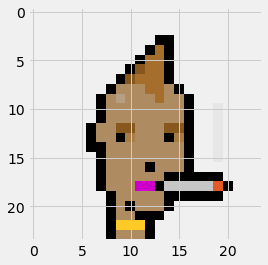

In [30]:
#Show the image as a picture

img = plt.imshow(X_train[index])

In [31]:
#Get the image label 
print('The image label is ', y_train[index])

The image label is  [1]


In [32]:
# Get the image classification

#Print the image class
print('The image class is: ', type_classification[int(y_train[index])])

The image class is:  Female


In [33]:
#create the models architecture
model= Sequential()

#Add the first layer
model.add( Conv2D(32,(5,5), activation='relu', input_shape=(24,24,4)))

#Add a pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Add another convolution layer
model.add( Conv2D(32,(5,5), activation='relu'))

#Add a pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Add a flattening layer
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Add a layer with 3 output neurons
model.add(Dense(3, activation='softmax'))

In [34]:
#Compile the model
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [35]:
#Train the model
hist = model.fit(X_train, y_train_one_hot,
                batch_size = 256, 
                epochs = 10, 
                validation_split = 0.2)

2022-01-09 14:06:32.752761: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-09 14:06:32.926104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10
24/24 [==============================] - 1s 26ms/step - loss: 0.5524 - accuracy: 0.7368 - val_loss: 0.0767 - val_accuracy: 0.9847
Epoch 2/10
 5/24 [=====>........................] - ETA: 0s - loss: 0.0702 - accuracy: 0.9883

2022-01-09 14:06:33.669059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 0s 18ms/step - loss: 0.0588 - accuracy: 0.9872 - val_loss: 0.0327 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 0s 18ms/step - loss: 0.0336 - accuracy: 0.9877 - val_loss: 0.0337 - val_accuracy: 0.9907
Epoch 4/10
24/24 [==============================] - 0s 18ms/step - loss: 0.0169 - accuracy: 0.9913 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 5/10
24/24 [==============================] - 0s 18ms/step - loss: 0.0133 - accuracy: 0.9952 - val_loss: 0.0019 - val_accuracy: 0.9993
Epoch 6/10
24/24 [==============================] - 0s 18ms/step - loss: 0.0087 - accuracy: 0.9973 - val_loss: 0.0026 - val_accuracy: 0.9987
Epoch 7/10
24/24 [==============================] - 0s 16ms/step - loss: 0.0024 - accuracy: 0.9990 - val_loss: 3.5898e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24 [==============================] - 0s 16ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 1.6067e-04 - val_accuracy: 1.0000
Epoch 9/10
24/24

In [36]:
#Evaluate the model using the test data set
model.evaluate(X_test, y_test_one_hot)[1]

79/79 [==============================] - 1s 7ms/step - loss: 3.7786e-04 - accuracy: 1.0000


1.0

In [37]:
# View a summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 20, 32)        3232      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense (Dense)               (None, 1000)             

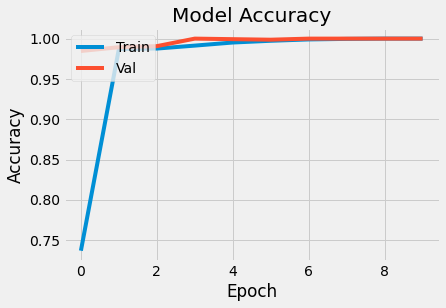

In [38]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

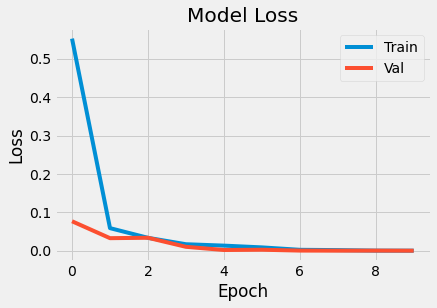

In [39]:
#Visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

## Use the Model to Make Predictions

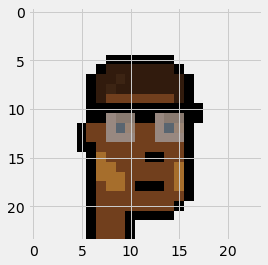

In [40]:
# Read a random Crypto Punk image and predict the type
id = random.randint(0,9999)

# set the fillename based on that id
file_to_open = ("data/images/"+str(id)+".png")
    
# Read the predict RGB image for that id
pred_rgb_image = Image.open(file_to_open)

# Convert the image to a bit array
pred_rgb_bitmap = np.array(pred_rgb_image)

#Show the image as a picture
img = plt.imshow(pred_rgb_bitmap)

In [41]:
# Inspect shape
print(pred_rgb_bitmap.shape)

(24, 24, 4)


In [42]:
images_list = []
images_list.append(np.array(pred_rgb_bitmap))
image_pred = np.asarray(images_list)

In [43]:
# Get the models predictions
predictions = model.predict(image_pred)
    
# Show the predictions
predictions

2022-01-09 14:06:38.444939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[1., 0., 0.]], dtype=float32)

In [44]:
model.evaluate(X_test,y_test_one_hot)

79/79 [==============================] - 1s 7ms/step - loss: 3.7786e-04 - accuracy: 1.0000


[0.0003778597165364772, 1.0]

In [45]:
pred_list = model.predict(X_test).round(0)
pred_list

# compare pred_list to y_test to compare the predictions

2022-01-09 14:06:39.128361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [46]:
# Sort the predictions from the least to the greastest
list_index = [0,1,2] 
x = predictions

for i in range(3):
    for j in range (3):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp
            
#Shoe the sorted labels in order
print(list_index)

[0, 1, 2]


In [47]:
# Print the 3 predictions
for i in range(3):
    print(type_classification[list_index[i]], ':', round(predictions[0][list_index[i]]*100,2), '%')

Male : 100.0 %
Female : 0.0 %
Other : 0.0 %


In [48]:
# prediction_probability = model.predict_proba(X_test,y_test_one_hot)
# prediction_probability

## Run the predictions for all the images

In [49]:
# Make a copy of the input dataframe to store the predictions 
# and drop un-needed columns
type_predictions_df = machine_learning_df.drop(columns=["glasses_ML"])
type_predictions_df.head()

,punk_id,type,accessories,type_ML
0,0,Female,"['Green Eye Shadow', 'Earring', 'Blonde Bob']",1
1,1,Male,"['Smile', 'Mohawk']",0
2,2,Female,['Wild Hair'],1
3,3,Male,"['Wild Hair', 'Nerd Glasses', 'Pipe']",0
4,4,Male,"['Big Shades', 'Wild Hair', 'Earring', 'Goat']",0


In [50]:
# Loop through each punk_id image and add the prediction to the dataframe

# 1. Create a list of the punk id's to loop through
punk_ids = type_predictions_df['punk_id'].tolist()

# 2. Create an empty list to store the images
images_list = []

# 3. Loop through the ids and store the bitmap images to the list
for id in punk_ids:

    # set the fillename based on that id
    file_to_open = ("data/images/"+str(id)+".png")
    
    # Read the predict RGB image for that id
    pred_rgb_image = Image.open(file_to_open)

    # Convert the image to a bit array
    pred_rgb_bitmap = np.array(pred_rgb_image)

    images_list.append(np.array(pred_rgb_bitmap))

In [51]:
# Change the shape of the object
image_pred = np.asarray(images_list)

In [52]:
# Process all predictions from the list
pred_list = model.predict(image_pred).round(0)
pred_list

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [53]:
# Add the predictions to the dataframe
print(len(pred_list))

for i in range(len(pred_list)):
    for type in range(3):
        if pred_list[i][type] == 1:
            type_predictions_df.loc[i,"type_PRED"] = type

# Inspect the dataframe    
type_predictions_df.head()

10000


,punk_id,type,accessories,type_ML,type_PRED
0,0,Female,"['Green Eye Shadow', 'Earring', 'Blonde Bob']",1,1.0
1,1,Male,"['Smile', 'Mohawk']",0,0.0
2,2,Female,['Wild Hair'],1,1.0
3,3,Male,"['Wild Hair', 'Nerd Glasses', 'Pipe']",0,0.0
4,4,Male,"['Big Shades', 'Wild Hair', 'Earring', 'Goat']",0,0.0


In [54]:
# Inspect the data types
type_predictions_df.dtypes

punk_id          int64
type            object
accessories     object
type_ML          int64
type_PRED      float64
dtype: object

In [55]:
# Change the prediction data type to integer
type_predictions_df["type_PRED"] = type_predictions_df["type_PRED"].astype(int)
type_predictions_df.head() 

,punk_id,type,accessories,type_ML,type_PRED
0,0,Female,"['Green Eye Shadow', 'Earring', 'Blonde Bob']",1,1
1,1,Male,"['Smile', 'Mohawk']",0,0
2,2,Female,['Wild Hair'],1,1
3,3,Male,"['Wild Hair', 'Nerd Glasses', 'Pipe']",0,0
4,4,Male,"['Big Shades', 'Wild Hair', 'Earring', 'Goat']",0,0


In [56]:
# Find the incorrect predictions
incorrect_pred_df = type_predictions_df[type_predictions_df["type_ML"] != type_predictions_df["type_PRED"] ]
incorrect_pred_df

,punk_id,type,accessories,type_ML,type_PRED
2566,2566,Zombie,"['Messy Hair', 'Normal Beard']",2,0
8909,8909,Zombie,"['Luxurious Beard', 'Police Cap', 'Regular Sha...",2,0


In [57]:
# Find the correct predictions for the "Others" type (value=2)
correct_pred_df = type_predictions_df[(type_predictions_df["type_ML"] == 2) & (type_predictions_df["type_ML"] == type_predictions_df["type_PRED"]) ]
correct_pred_df

,punk_id,type,accessories,type_ML,type_PRED
117,117,Zombie,"['Messy Hair', 'Front Beard Dark']",2,2
372,372,Ape,['Cap Forward'],2,2
635,635,Alien,"['Bandana', 'Regular Shades']",2,2
987,987,Zombie,"['Wild Hair', 'Horned Rim Glasses']",2,2
1021,1021,Ape,"['Cap', 'Eye Patch']",2,2
...,...,...,...,...,...
9804,9804,Zombie,"['Stringy Hair', 'Shadow Beard', 'Smile', 'Sma...",2,2
9838,9838,Zombie,"['Peak Spike', 'Front Beard Dark', 'Earring']",2,2
9909,9909,Zombie,['Cap'],2,2
9955,9955,Zombie,['Shaved Head'],2,2


In [58]:
# Calculate accuracy for type = "Other"
a = len(incorrect_pred_df)
b = len(correct_pred_df)
print("Accuracy for type \"Other\" is :", b/(a+b))

Accuracy for type "Other" is : 0.9834710743801653


## *** NOTE: Accuracy for "Other" varies significantly with every run. How can we make it more consistent??

In [59]:
######################################################################
# EXPORT THE DATAFRAME AS A CSV FILE
######################################################################

#type_predictions_df.to_csv(r'Data/type_predictions.csv', index = False)

## Run the model several iterations to capture accuracy statistics for type "Other"

In [79]:
#Create an empty dataframe to store the model run statistics
# 1. column name list 
col_names =  ["Model Accuracy","type Other Accuracy","Count Other Correct","Count Other Incorrect"]
  
# 2. create an empty dataframe with columns
model_statistics_df  = pd.DataFrame(columns = col_names)

# Provide the number of desired runs
runs = 100

# Loop to run the model
for run in range(runs):
    # Create a list of the target training data
    X_list =[]
    y_list =[]

    for i in range(len(machine_learning_list)):
        X_list.append(machine_learning_list[i]["normalized_bitmap"])
        y_list.append([machine_learning_list[i]["type_ML"]])
        
        
    #DECLARE X and Y variables as np.arrays
    X = np.asarray(X_list)
    y = np.asarray(y_list)
    
    # Use sklearn to split dataset
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
    
    # Convert the labels into a set of 3 catagorical nummbers 
    # to input into the reunral network
    y_train_one_hot = to_categorical(y_train)
    y_test_one_hot = to_categorical(y_test)
    
    # Create the Keras Sequential model
    nn_model = tf.keras.models.Sequential()
    
    #create the models architecture
    model= Sequential()

    #Add the first layer
    model.add( Conv2D(32,(5,5), activation='relu', input_shape=(24,24,4)))

    #Add a pooling layer
    model.add(MaxPooling2D(pool_size = (2,2)))

    #Add another convolution layer
    model.add( Conv2D(32,(5,5), activation='relu'))

    #Add a pooling layer
    model.add(MaxPooling2D(pool_size = (2,2)))

    #Add a flattening layer
    model.add(Flatten())

    #Add a layer with 1000 neurons
    model.add(Dense(1000, activation='relu'))

    #Add a drop out layer
    model.add(Dropout(0.5))

    #Add a layer with 500 neurons
    model.add(Dense(500, activation='relu'))

    #Add a drop out layer
    model.add(Dropout(0.5))

    #Add a layer with 250 neurons
    model.add(Dense(250, activation='relu'))

    #Add a layer with 3 output neurons
    model.add(Dense(3, activation='softmax'))
    
    #Compile the model
    model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])
    
    #Train the model
    hist = model.fit(X_train, y_train_one_hot,
                batch_size = 256, 
                epochs = 10, 
                validation_split = 0.2)
    
    #Evaluate the model using the test data set
    model_accuracy = model.evaluate(X_test, y_test_one_hot)[1]
    
    # Make a copy of the input dataframe to store the predictions 
    # and drop un-needed columns
    type_predictions_df = machine_learning_df.drop(columns=["glasses_ML"])
    
    # Loop through each punk_id image and add the prediction to the dataframe
    
    # 1. Create a list of the punk id's to loop through
    punk_ids = type_predictions_df['punk_id'].tolist()

    # 2. Create an empty list to store the images
    images_list = []

    # 3. Loop through the ids and store the bitmap images to the list
    for id in punk_ids:

        # set the fillename based on that id
        file_to_open = ("data/images/"+str(id)+".png")
    
        # Read the predict RGB image for that id
        pred_rgb_image = Image.open(file_to_open)

        # Convert the image to a bit array
        pred_rgb_bitmap = np.array(pred_rgb_image)

        images_list.append(np.array(pred_rgb_bitmap))
    
    # Change the shape of the object
    image_pred = np.asarray(images_list)
    
    # Process all predictions from the list
    pred_list = model.predict(image_pred).round(0)
    
    # Add the predictions to the dataframe
    for i in range(len(pred_list)):
        for type in range(3):
            if pred_list[i][type] == 1:
                type_predictions_df.loc[i,"type_PRED"] = type

    # Change the prediction data type to integer
    type_predictions_df["type_PRED"] = type_predictions_df["type_PRED"].astype(int)

    # Find the incorrect predictions
    incorrect_pred_df = type_predictions_df[type_predictions_df["type_ML"] != type_predictions_df["type_PRED"] ]
    
    # Find the correct predictions for the "Others" type (value=2)
    correct_pred_df = type_predictions_df[(type_predictions_df["type_ML"] == 2) & (type_predictions_df["type_ML"] == type_predictions_df["type_PRED"]) ]

    # Calculate accuracy for type = "Other"
    a = len(incorrect_pred_df)
    b = len(correct_pred_df)
    accuracy_other= b/(a+b)
    
    # Print model statistics
    print("Run ",run,"   ---- Model Accuracy: ",model_accuracy," --- \"Other\" Accuracy: ",accuracy_other)
                                                                              
    # Store the model_accuracy and accuracy_other statistics in a table
    model_statistics_df.loc[len(model_statistics_df.index)] = [model_accuracy,accuracy_other,b,a]


Epoch 1/10


2022-01-09 22:11:33.332250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5485 - accuracy: 0.7600

2022-01-09 22:11:34.732655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 54ms/step - loss: 0.5485 - accuracy: 0.7600 - val_loss: 0.0699 - val_accuracy: 0.9860
Epoch 2/10
24/24 [==============================] - 1s 31ms/step - loss: 0.0585 - accuracy: 0.9868 - val_loss: 0.0316 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 39ms/step - loss: 0.0363 - accuracy: 0.9877 - val_loss: 0.0318 - val_accuracy: 0.9920
Epoch 4/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0196 - accuracy: 0.9910 - val_loss: 0.0054 - val_accuracy: 0.9987
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0059 - accuracy: 0.9985 - val_loss: 0.0052 - val_accuracy: 0.9980
Epoch 6/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 5.1360e-04 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0038 - accuracy: 0.9983 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 8/10
24/24 [==

2022-01-09 22:11:43.804263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  0    ---- Model Accuracy:  1.0  --- "Other" Accuracy:  0.9917355371900827
Epoch 1/10


2022-01-09 22:11:45.405138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5018 - accuracy: 0.7740

2022-01-09 22:11:46.715725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 50ms/step - loss: 0.5018 - accuracy: 0.7740 - val_loss: 0.0555 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 30ms/step - loss: 0.0540 - accuracy: 0.9875 - val_loss: 0.0565 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0372 - accuracy: 0.9872 - val_loss: 0.0190 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0149 - accuracy: 0.9922 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0044 - accuracy: 0.9990 - val_loss: 0.0055 - val_accuracy: 0.9973
Epoch 6/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0159 - accuracy: 0.9945 - val_loss: 0.0058 - val_accuracy: 0.9980
Epoch 7/10
24/24 [==============================] - 1s 31ms/step - loss: 0.0050 - accuracy: 0.9985 - val_loss: 0.0015 - val_accuracy: 0.9993
Epoch 8/10
24/24 [======

2022-01-09 22:11:55.914578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  1    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9421487603305785
Epoch 1/10


2022-01-09 22:11:58.280839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5004 - accuracy: 0.7825

2022-01-09 22:11:59.717358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 58ms/step - loss: 0.5004 - accuracy: 0.7825 - val_loss: 0.0671 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0550 - accuracy: 0.9877 - val_loss: 0.0326 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0273 - accuracy: 0.9887 - val_loss: 0.0112 - val_accuracy: 0.9987
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.0023 - val_accuracy: 0.9987
Epoch 5/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0100 - accuracy: 0.9955 - val_loss: 0.0043 - val_accuracy: 0.9980
Epoch 6/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.0031 - val_accuracy: 0.9987
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 5.4332e-04 - accuracy: 1.0000 - val_loss: 5.4969e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24

2022-01-09 22:12:08.466615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  2    ---- Model Accuracy:  0.9992000460624695  --- "Other" Accuracy:  0.8181818181818182
Epoch 1/10


2022-01-09 22:12:10.559727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5269 - accuracy: 0.7632

2022-01-09 22:12:12.045068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 58ms/step - loss: 0.5269 - accuracy: 0.7632 - val_loss: 0.0756 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0659 - accuracy: 0.9868 - val_loss: 0.0509 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0447 - accuracy: 0.9875 - val_loss: 0.0258 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0260 - accuracy: 0.9880 - val_loss: 0.0202 - val_accuracy: 0.9947
Epoch 5/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0129 - accuracy: 0.9948 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0069 - accuracy: 0.9975 - val_loss: 0.0028 - val_accuracy: 0.9987
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0064 - accuracy: 0.9982 - val_loss: 0.0854 - val_accuracy: 0.9573
Epoch 8/10
24/24 [======

2022-01-09 22:12:20.296434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  3    ---- Model Accuracy:  0.9992000460624695  --- "Other" Accuracy:  0.9669421487603306
Epoch 1/10


2022-01-09 22:12:21.854763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4860 - accuracy: 0.7897

2022-01-09 22:12:23.274491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 58ms/step - loss: 0.4860 - accuracy: 0.7897 - val_loss: 0.0728 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0621 - accuracy: 0.9868 - val_loss: 0.0412 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0348 - accuracy: 0.9875 - val_loss: 0.0174 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0188 - accuracy: 0.9912 - val_loss: 0.0063 - val_accuracy: 0.9993
Epoch 5/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0288 - accuracy: 0.9905 - val_loss: 0.0119 - val_accuracy: 0.9953
Epoch 6/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0115 - accuracy: 0.9957 - val_loss: 0.0104 - val_accuracy: 0.9987
Epoch 7/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0039 - accuracy: 0.9992 - val_loss: 0.0045 - val_accuracy: 0.9980
Epoch 8/10
24/24 [======

2022-01-09 22:12:31.777570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  4    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9586776859504132
Epoch 1/10


2022-01-09 22:12:33.529122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5274 - accuracy: 0.7718

2022-01-09 22:12:34.811219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 50ms/step - loss: 0.5274 - accuracy: 0.7718 - val_loss: 0.0592 - val_accuracy: 0.9887
Epoch 2/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0551 - accuracy: 0.9875 - val_loss: 0.0286 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0291 - accuracy: 0.9883 - val_loss: 0.0137 - val_accuracy: 0.9933
Epoch 4/10
24/24 [==============================] - 1s 30ms/step - loss: 0.0114 - accuracy: 0.9952 - val_loss: 0.0047 - val_accuracy: 0.9980
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0041 - val_accuracy: 0.9980
Epoch 6/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0041 - accuracy: 0.9982 - val_loss: 0.0020 - val_accuracy: 0.9993
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.0015 - val_accuracy: 0.9993
Epoch 8/10
24/24 [======

2022-01-09 22:12:43.178418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  5    ---- Model Accuracy:  0.9068000316619873  --- "Other" Accuracy:  0.35693215339233036
Epoch 1/10


2022-01-09 22:12:45.410795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5225 - accuracy: 0.7723

2022-01-09 22:12:46.716596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 51ms/step - loss: 0.5225 - accuracy: 0.7723 - val_loss: 0.0632 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0471 - accuracy: 0.9877 - val_loss: 0.0333 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0398 - accuracy: 0.9872 - val_loss: 0.0229 - val_accuracy: 0.9920
Epoch 4/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0199 - accuracy: 0.9917 - val_loss: 0.0054 - val_accuracy: 0.9993
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0071 - accuracy: 0.9982 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 9.4960e-04 - accuracy: 0.9998 - val_loss: 4.1696e-04 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 26ms/step - loss: 9.3551e-04 - accuracy: 0.9997 - val_loss: 0.0014 - val_accuracy: 0.9993
Epoch 8/10
2

2022-01-09 22:12:55.108026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  6    ---- Model Accuracy:  0.9984000325202942  --- "Other" Accuracy:  1.0
Epoch 1/10


2022-01-09 22:12:56.726171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4861 - accuracy: 0.7843

2022-01-09 22:12:57.950850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 49ms/step - loss: 0.4861 - accuracy: 0.7843 - val_loss: 0.0543 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0513 - accuracy: 0.9877 - val_loss: 0.0314 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0361 - accuracy: 0.9875 - val_loss: 0.0270 - val_accuracy: 0.9907
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0153 - accuracy: 0.9943 - val_loss: 0.0041 - val_accuracy: 0.9980
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0056 - val_accuracy: 0.9967
Epoch 6/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0067 - accuracy: 0.9977 - val_loss: 0.0017 - val_accuracy: 0.9993
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.0017 - val_accuracy: 0.9993
Epoch 8/10
24/24 [======

2022-01-09 22:13:06.304851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  7    ---- Model Accuracy:  1.0  --- "Other" Accuracy:  0.9752066115702479
Epoch 1/10


2022-01-09 22:13:07.986594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4741 - accuracy: 0.7912

2022-01-09 22:13:09.254234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 51ms/step - loss: 0.4741 - accuracy: 0.7912 - val_loss: 0.0634 - val_accuracy: 0.9860
Epoch 2/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0547 - accuracy: 0.9875 - val_loss: 0.0367 - val_accuracy: 0.9887
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0330 - accuracy: 0.9875 - val_loss: 0.0174 - val_accuracy: 0.9953
Epoch 4/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0155 - accuracy: 0.9937 - val_loss: 0.0096 - val_accuracy: 0.9960
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0311 - accuracy: 0.9895 - val_loss: 0.0092 - val_accuracy: 0.9967
Epoch 6/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0067 - accuracy: 0.9980 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 2.5022e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24 [==

2022-01-09 22:13:17.575138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  8    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9917355371900827
Epoch 1/10


2022-01-09 22:13:19.184910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5123 - accuracy: 0.7698

2022-01-09 22:13:20.460148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 52ms/step - loss: 0.5123 - accuracy: 0.7698 - val_loss: 0.0609 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 29ms/step - loss: 0.0613 - accuracy: 0.9873 - val_loss: 0.0360 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0423 - accuracy: 0.9877 - val_loss: 0.0223 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0265 - accuracy: 0.9887 - val_loss: 0.0195 - val_accuracy: 0.9893
Epoch 5/10
24/24 [==============================] - 1s 23ms/step - loss: 0.0091 - accuracy: 0.9972 - val_loss: 0.0030 - val_accuracy: 0.9987
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0037 - accuracy: 0.9985 - val_loss: 0.0028 - val_accuracy: 0.9987
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0032 - accuracy: 0.9988 - val_loss: 4.6713e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24 [==

2022-01-09 22:13:28.774535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  9    ---- Model Accuracy:  1.0  --- "Other" Accuracy:  0.9752066115702479
Epoch 1/10


2022-01-09 22:13:30.841300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4918 - accuracy: 0.7862

2022-01-09 22:13:32.092699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 51ms/step - loss: 0.4918 - accuracy: 0.7862 - val_loss: 0.0676 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0538 - accuracy: 0.9875 - val_loss: 0.0395 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.0162 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0148 - accuracy: 0.9918 - val_loss: 0.0078 - val_accuracy: 0.9987
Epoch 5/10
24/24 [==============================] - 1s 23ms/step - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.0021 - val_accuracy: 0.9993
Epoch 6/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 6.7350e-04 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0015 - accuracy: 0.9993 - val_loss: 2.1936e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24

2022-01-09 22:13:40.529128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  10    ---- Model Accuracy:  1.0  --- "Other" Accuracy:  0.9917355371900827
Epoch 1/10


2022-01-09 22:13:42.156468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4921 - accuracy: 0.7835

2022-01-09 22:13:43.372091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 49ms/step - loss: 0.4921 - accuracy: 0.7835 - val_loss: 0.0678 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0668 - accuracy: 0.9865 - val_loss: 0.0429 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0429 - accuracy: 0.9877 - val_loss: 0.0311 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0269 - accuracy: 0.9888 - val_loss: 0.0148 - val_accuracy: 0.9907
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0114 - accuracy: 0.9962 - val_loss: 0.0027 - val_accuracy: 0.9987
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 9.7707e-04 - val_accuracy: 0.9993
Epoch 7/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0040 - accuracy: 0.9990 - val_loss: 0.0993 - val_accuracy: 0.9893
Epoch 8/10
24/24 [==

2022-01-09 22:13:51.784095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  11    ---- Model Accuracy:  0.9992000460624695  --- "Other" Accuracy:  1.0
Epoch 1/10


2022-01-09 22:13:53.361961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5226 - accuracy: 0.7672

2022-01-09 22:13:54.625311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 53ms/step - loss: 0.5226 - accuracy: 0.7672 - val_loss: 0.0681 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0572 - accuracy: 0.9877 - val_loss: 0.0427 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0381 - accuracy: 0.9875 - val_loss: 0.0193 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0180 - accuracy: 0.9910 - val_loss: 0.0057 - val_accuracy: 0.9987
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0092 - accuracy: 0.9973 - val_loss: 0.0034 - val_accuracy: 0.9987
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0011 - val_accuracy: 0.9993
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0291 - val_accuracy: 0.9900
Epoch 8/10
24/24 [======

2022-01-09 22:14:03.039585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  12    ---- Model Accuracy:  0.9988000392913818  --- "Other" Accuracy:  0.8347107438016529
Epoch 1/10


2022-01-09 22:14:04.652675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4679 - accuracy: 0.8025

2022-01-09 22:14:06.005226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 55ms/step - loss: 0.4679 - accuracy: 0.8025 - val_loss: 0.0670 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0553 - accuracy: 0.9877 - val_loss: 0.0330 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0323 - accuracy: 0.9875 - val_loss: 0.0181 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0203 - accuracy: 0.9905 - val_loss: 0.0104 - val_accuracy: 0.9973
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0063 - accuracy: 0.9983 - val_loss: 0.0019 - val_accuracy: 0.9993
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0061 - accuracy: 0.9982 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 2.5097e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24 [==

2022-01-09 22:14:14.280324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  13    ---- Model Accuracy:  1.0  --- "Other" Accuracy:  0.9504132231404959
Epoch 1/10


2022-01-09 22:14:16.309166: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5062 - accuracy: 0.7795

2022-01-09 22:14:17.604697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 51ms/step - loss: 0.5062 - accuracy: 0.7795 - val_loss: 0.0621 - val_accuracy: 0.9887
Epoch 2/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0571 - accuracy: 0.9873 - val_loss: 0.0334 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0295 - accuracy: 0.9877 - val_loss: 0.0147 - val_accuracy: 0.9913
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0122 - accuracy: 0.9953 - val_loss: 0.0137 - val_accuracy: 0.9980
Epoch 5/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0124 - accuracy: 0.9957 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0049 - val_accuracy: 0.9973
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0011 - accuracy: 0.9995 - val_loss: 3.5162e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24 [==

2022-01-09 22:14:25.956146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  14    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9173553719008265
Epoch 1/10


2022-01-09 22:14:27.574397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4740 - accuracy: 0.8008

2022-01-09 22:14:28.849066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 51ms/step - loss: 0.4740 - accuracy: 0.8008 - val_loss: 0.0698 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0577 - accuracy: 0.9877 - val_loss: 0.0391 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0348 - accuracy: 0.9877 - val_loss: 0.0149 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0151 - accuracy: 0.9945 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.0079 - val_accuracy: 0.9967
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.0059 - val_accuracy: 0.9973
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0051 - accuracy: 0.9987 - val_loss: 0.0235 - val_accuracy: 0.9940
Epoch 8/10
24/24 [======

2022-01-09 22:14:37.061888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  15    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9752066115702479
Epoch 1/10


2022-01-09 22:14:38.725387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4936 - accuracy: 0.7750

2022-01-09 22:14:39.989150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 52ms/step - loss: 0.4936 - accuracy: 0.7750 - val_loss: 0.0669 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0520 - accuracy: 0.9877 - val_loss: 0.0420 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0307 - accuracy: 0.9880 - val_loss: 0.0083 - val_accuracy: 0.9973
Epoch 4/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0098 - accuracy: 0.9960 - val_loss: 0.0082 - val_accuracy: 0.9967
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.0529 - val_accuracy: 0.9893
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0130 - accuracy: 0.9968 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 1.4614e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24 [==

2022-01-09 22:14:47.329617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  16    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9090909090909091
Epoch 1/10


2022-01-09 22:14:48.946663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5159 - accuracy: 0.7690

2022-01-09 22:14:50.192512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 50ms/step - loss: 0.5159 - accuracy: 0.7690 - val_loss: 0.0606 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 31ms/step - loss: 0.0588 - accuracy: 0.9877 - val_loss: 0.0435 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0360 - accuracy: 0.9877 - val_loss: 0.0155 - val_accuracy: 0.9907
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0163 - accuracy: 0.9930 - val_loss: 0.0053 - val_accuracy: 0.9987
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0049 - accuracy: 0.9988 - val_loss: 0.0077 - val_accuracy: 0.9973
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0119 - accuracy: 0.9952 - val_loss: 0.0025 - val_accuracy: 0.9993
Epoch 7/10
24/24 [==============================] - 1s 23ms/step - loss: 0.0053 - accuracy: 0.9987 - val_loss: 0.0104 - val_accuracy: 0.9967
Epoch 8/10
24/24 [======

2022-01-09 22:14:57.710235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  17    ---- Model Accuracy:  1.0  --- "Other" Accuracy:  0.9834710743801653
Epoch 1/10


2022-01-09 22:14:59.775145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4770 - accuracy: 0.8012

2022-01-09 22:15:01.125179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 55ms/step - loss: 0.4770 - accuracy: 0.8012 - val_loss: 0.0539 - val_accuracy: 0.9887
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0577 - accuracy: 0.9870 - val_loss: 0.0352 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0335 - accuracy: 0.9878 - val_loss: 0.0167 - val_accuracy: 0.9900
Epoch 4/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0127 - accuracy: 0.9947 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0149 - accuracy: 0.9960 - val_loss: 0.0048 - val_accuracy: 0.9987
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 8.0660e-04 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0100 - val_accuracy: 0.9967
Epoch 8/10
24/24 [==

2022-01-09 22:15:08.830417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  18    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9421487603305785
Epoch 1/10


2022-01-09 22:15:10.453142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5323 - accuracy: 0.7743

2022-01-09 22:15:11.766215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 54ms/step - loss: 0.5323 - accuracy: 0.7743 - val_loss: 0.0775 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0588 - accuracy: 0.9872 - val_loss: 0.0393 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0412 - accuracy: 0.9877 - val_loss: 0.0227 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0231 - accuracy: 0.9888 - val_loss: 0.0094 - val_accuracy: 0.9980
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0081 - accuracy: 0.9973 - val_loss: 0.0054 - val_accuracy: 0.9980
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0039 - accuracy: 0.9990 - val_loss: 8.4212e-04 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0053 - val_accuracy: 0.9980
Epoch 8/10
24/24 [==

2022-01-09 22:15:19.376318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  19    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9008264462809917
Epoch 1/10


2022-01-09 22:15:20.922930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4882 - accuracy: 0.7903

2022-01-09 22:15:22.200779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 52ms/step - loss: 0.4882 - accuracy: 0.7903 - val_loss: 0.0767 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0680 - accuracy: 0.9860 - val_loss: 0.0444 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0437 - accuracy: 0.9877 - val_loss: 0.0324 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0242 - accuracy: 0.9880 - val_loss: 0.0107 - val_accuracy: 0.9953
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0112 - accuracy: 0.9958 - val_loss: 0.0041 - val_accuracy: 0.9987
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0033 - val_accuracy: 0.9980
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0261 - accuracy: 0.9930 - val_loss: 0.0098 - val_accuracy: 0.9993
Epoch 8/10
24/24 [======

2022-01-09 22:15:29.777364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  20    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9669421487603306
Epoch 1/10


2022-01-09 22:15:31.351664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5003 - accuracy: 0.7840

2022-01-09 22:15:32.672299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 53ms/step - loss: 0.5003 - accuracy: 0.7840 - val_loss: 0.0589 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0537 - accuracy: 0.9875 - val_loss: 0.0323 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0326 - accuracy: 0.9878 - val_loss: 0.0189 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0159 - accuracy: 0.9925 - val_loss: 0.0114 - val_accuracy: 0.9960
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.0284 - val_accuracy: 0.9933
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0088 - accuracy: 0.9977 - val_loss: 0.1053 - val_accuracy: 0.9893
Epoch 8/10
24/24 [======

2022-01-09 22:15:40.372902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  21    ---- Model Accuracy:  1.0  --- "Other" Accuracy:  0.9421487603305785
Epoch 1/10


2022-01-09 22:15:42.494006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5071 - accuracy: 0.7783

2022-01-09 22:15:43.740155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 50ms/step - loss: 0.5071 - accuracy: 0.7783 - val_loss: 0.0662 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 29ms/step - loss: 0.0505 - accuracy: 0.9877 - val_loss: 0.0357 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0297 - accuracy: 0.9880 - val_loss: 0.0205 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0118 - accuracy: 0.9967 - val_loss: 0.0025 - val_accuracy: 0.9987
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.0037 - val_accuracy: 0.9987
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0066 - accuracy: 0.9975 - val_loss: 0.0013 - val_accuracy: 0.9993
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.0147 - val_accuracy: 0.9973
Epoch 8/10
24/24 [======

2022-01-09 22:15:52.261103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  22    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9834710743801653
Epoch 1/10


2022-01-09 22:15:53.911580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4739 - accuracy: 0.8003

2022-01-09 22:15:55.212284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 52ms/step - loss: 0.4739 - accuracy: 0.8003 - val_loss: 0.0541 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0512 - accuracy: 0.9875 - val_loss: 0.0286 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0318 - accuracy: 0.9877 - val_loss: 0.0155 - val_accuracy: 0.9907
Epoch 4/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0157 - accuracy: 0.9937 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0167 - accuracy: 0.9948 - val_loss: 0.0321 - val_accuracy: 0.9893
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0097 - accuracy: 0.9970 - val_loss: 0.0035 - val_accuracy: 0.9980
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 2.3719e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24 [==

2022-01-09 22:16:03.607403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  23    ---- Model Accuracy:  1.0  --- "Other" Accuracy:  0.9669421487603306
Epoch 1/10


2022-01-09 22:16:05.189789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4531 - accuracy: 0.8045

2022-01-09 22:16:06.500153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 52ms/step - loss: 0.4531 - accuracy: 0.8045 - val_loss: 0.0525 - val_accuracy: 0.9887
Epoch 2/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0528 - accuracy: 0.9877 - val_loss: 0.0342 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0336 - accuracy: 0.9878 - val_loss: 0.0140 - val_accuracy: 0.9907
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0116 - accuracy: 0.9955 - val_loss: 0.0028 - val_accuracy: 0.9987
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0169 - accuracy: 0.9937 - val_loss: 0.0209 - val_accuracy: 0.9920
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0194 - accuracy: 0.9943 - val_loss: 0.0024 - val_accuracy: 0.9993
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0021 - accuracy: 0.9997 - val_loss: 3.5426e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24 [==

2022-01-09 22:16:14.873044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  24    ---- Model Accuracy:  1.0  --- "Other" Accuracy:  0.9917355371900827
Epoch 1/10


2022-01-09 22:16:16.505568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5616 - accuracy: 0.7558

2022-01-09 22:16:17.757635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 50ms/step - loss: 0.5616 - accuracy: 0.7558 - val_loss: 0.0836 - val_accuracy: 0.9887
Epoch 2/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0611 - accuracy: 0.9877 - val_loss: 0.0304 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0285 - accuracy: 0.9885 - val_loss: 0.0180 - val_accuracy: 0.9940
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0291 - accuracy: 0.9897 - val_loss: 0.0108 - val_accuracy: 0.9947
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0090 - accuracy: 0.9965 - val_loss: 0.0083 - val_accuracy: 0.9973
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 8.3714e-04 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0036 - val_accuracy: 0.9987
Epoch 8/10
24/24 [==

2022-01-09 22:16:26.257160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  25    ---- Model Accuracy:  0.9960000514984131  --- "Other" Accuracy:  0.5041322314049587
Epoch 1/10


2022-01-09 22:16:28.482870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4769 - accuracy: 0.7980

2022-01-09 22:16:29.842613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 55ms/step - loss: 0.4769 - accuracy: 0.7980 - val_loss: 0.0551 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 29ms/step - loss: 0.0498 - accuracy: 0.9875 - val_loss: 0.0283 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0237 - accuracy: 0.9885 - val_loss: 0.0163 - val_accuracy: 0.9900
Epoch 4/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0132 - accuracy: 0.9952 - val_loss: 0.0205 - val_accuracy: 0.9947
Epoch 5/10
24/24 [==============================] - 1s 30ms/step - loss: 0.0235 - accuracy: 0.9928 - val_loss: 0.0055 - val_accuracy: 0.9993
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0012 - val_accuracy: 0.9993
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 6.4084e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 0.9993
Epoch 8/10
24/24 [==

2022-01-09 22:16:38.693830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  26    ---- Model Accuracy:  0.9984000325202942  --- "Other" Accuracy:  0.9918032786885246
Epoch 1/10


2022-01-09 22:16:40.498594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4979 - accuracy: 0.7807

2022-01-09 22:16:41.865701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 55ms/step - loss: 0.4979 - accuracy: 0.7807 - val_loss: 0.0660 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0556 - accuracy: 0.9877 - val_loss: 0.0325 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0367 - accuracy: 0.9877 - val_loss: 0.0226 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0196 - accuracy: 0.9905 - val_loss: 0.0132 - val_accuracy: 0.9920
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0077 - accuracy: 0.9978 - val_loss: 0.0119 - val_accuracy: 0.9967
Epoch 6/10
24/24 [==============================] - 1s 23ms/step - loss: 0.0105 - accuracy: 0.9972 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0025 - val_accuracy: 0.9987
Epoch 8/10
24/24 [======

2022-01-09 22:16:49.071832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  27    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9586776859504132
Epoch 1/10


2022-01-09 22:16:50.684258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5119 - accuracy: 0.7782

2022-01-09 22:16:52.021002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 52ms/step - loss: 0.5119 - accuracy: 0.7782 - val_loss: 0.0568 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 29ms/step - loss: 0.0479 - accuracy: 0.9873 - val_loss: 0.0246 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0222 - accuracy: 0.9900 - val_loss: 0.0069 - val_accuracy: 0.9980
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0440 - accuracy: 0.9883 - val_loss: 0.0240 - val_accuracy: 0.9900
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0184 - accuracy: 0.9907 - val_loss: 0.0085 - val_accuracy: 0.9980
Epoch 6/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0055 - accuracy: 0.9990 - val_loss: 0.0140 - val_accuracy: 0.9967
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0057 - accuracy: 0.9985 - val_loss: 0.0036 - val_accuracy: 0.9980
Epoch 8/10
24/24 [======

2022-01-09 22:16:59.342224: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  28    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9338842975206612
Epoch 1/10


2022-01-09 22:17:00.938091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4866 - accuracy: 0.7868

2022-01-09 22:17:02.211271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 51ms/step - loss: 0.4866 - accuracy: 0.7868 - val_loss: 0.0616 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 36ms/step - loss: 0.0545 - accuracy: 0.9877 - val_loss: 0.0368 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0301 - accuracy: 0.9883 - val_loss: 0.0115 - val_accuracy: 0.9953
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0325 - accuracy: 0.9903 - val_loss: 0.0454 - val_accuracy: 0.9893
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0174 - accuracy: 0.9950 - val_loss: 0.0062 - val_accuracy: 0.9980
Epoch 6/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 7.5782e-04 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 2.5149e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24

2022-01-09 22:17:09.676824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  29    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9834710743801653
Epoch 1/10


2022-01-09 22:17:11.671174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5119 - accuracy: 0.7747

2022-01-09 22:17:12.971390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 53ms/step - loss: 0.5119 - accuracy: 0.7747 - val_loss: 0.0819 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0599 - accuracy: 0.9873 - val_loss: 0.0474 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0396 - accuracy: 0.9875 - val_loss: 0.0244 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0224 - accuracy: 0.9903 - val_loss: 0.0175 - val_accuracy: 0.9900
Epoch 5/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0081 - accuracy: 0.9975 - val_loss: 0.0136 - val_accuracy: 0.9953
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 5.7678e-04 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0032 - accuracy: 0.9997 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 8/10
24/24 [==

2022-01-09 22:17:20.943822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  30    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9834710743801653
Epoch 1/10


2022-01-09 22:17:22.629528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4864 - accuracy: 0.7927

2022-01-09 22:17:23.840963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 49ms/step - loss: 0.4864 - accuracy: 0.7927 - val_loss: 0.0625 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0552 - accuracy: 0.9872 - val_loss: 0.0346 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0404 - accuracy: 0.9877 - val_loss: 0.0718 - val_accuracy: 0.9853
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0317 - accuracy: 0.9878 - val_loss: 0.0127 - val_accuracy: 0.9953
Epoch 5/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0129 - accuracy: 0.9962 - val_loss: 0.0028 - val_accuracy: 0.9993
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0021 - val_accuracy: 0.9987
Epoch 7/10
24/24 [==============================] - 1s 23ms/step - loss: 8.2019e-04 - accuracy: 1.0000 - val_loss: 3.2164e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24

2022-01-09 22:17:31.686737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  31    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9917355371900827
Epoch 1/10


2022-01-09 22:17:33.234471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5121 - accuracy: 0.7718

2022-01-09 22:17:34.464576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 50ms/step - loss: 0.5121 - accuracy: 0.7718 - val_loss: 0.0577 - val_accuracy: 0.9880
Epoch 2/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0518 - accuracy: 0.9877 - val_loss: 0.0335 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0401 - accuracy: 0.9877 - val_loss: 0.0249 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0187 - accuracy: 0.9895 - val_loss: 0.0068 - val_accuracy: 0.9980
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0094 - accuracy: 0.9968 - val_loss: 0.0130 - val_accuracy: 0.9953
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0092 - accuracy: 0.9963 - val_loss: 0.0037 - val_accuracy: 0.9980
Epoch 7/10
24/24 [==============================] - 1s 29ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 3.8705e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24 [==

2022-01-09 22:17:42.368898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  32    ---- Model Accuracy:  0.9956000447273254  --- "Other" Accuracy:  0.5619834710743802
Epoch 1/10


2022-01-09 22:17:43.942035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5462 - accuracy: 0.7562

2022-01-09 22:17:45.213257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 52ms/step - loss: 0.5462 - accuracy: 0.7562 - val_loss: 0.0716 - val_accuracy: 0.9880
Epoch 2/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0588 - accuracy: 0.9868 - val_loss: 0.0350 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0384 - accuracy: 0.9875 - val_loss: 0.0198 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0192 - accuracy: 0.9905 - val_loss: 0.0084 - val_accuracy: 0.9953
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.0023 - val_accuracy: 0.9987
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0080 - accuracy: 0.9970 - val_loss: 0.0178 - val_accuracy: 0.9947
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0209 - accuracy: 0.9927 - val_loss: 0.0034 - val_accuracy: 0.9987
Epoch 8/10
24/24 [======

2022-01-09 22:17:53.134601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  33    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9834710743801653
Epoch 1/10


2022-01-09 22:17:55.196189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5065 - accuracy: 0.7833

2022-01-09 22:17:56.444215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 50ms/step - loss: 0.5065 - accuracy: 0.7833 - val_loss: 0.0545 - val_accuracy: 0.9887
Epoch 2/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0471 - accuracy: 0.9873 - val_loss: 0.0659 - val_accuracy: 0.9880
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0404 - accuracy: 0.9868 - val_loss: 0.0265 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0163 - accuracy: 0.9927 - val_loss: 0.0049 - val_accuracy: 0.9980
Epoch 5/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0056 - accuracy: 0.9988 - val_loss: 0.0072 - val_accuracy: 0.9980
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0186 - accuracy: 0.9955 - val_loss: 0.0056 - val_accuracy: 0.9993
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.0025 - val_accuracy: 0.9987
Epoch 8/10
24/24 [======

2022-01-09 22:18:04.459912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  34    ---- Model Accuracy:  0.997200071811676  --- "Other" Accuracy:  0.9603174603174603
Epoch 1/10


2022-01-09 22:18:06.051643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5717 - accuracy: 0.7130

2022-01-09 22:18:07.302466: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 50ms/step - loss: 0.5717 - accuracy: 0.7130 - val_loss: 0.0759 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0589 - accuracy: 0.9875 - val_loss: 0.0297 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0318 - accuracy: 0.9877 - val_loss: 0.0157 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0157 - accuracy: 0.9940 - val_loss: 0.0082 - val_accuracy: 0.9953
Epoch 5/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0081 - accuracy: 0.9968 - val_loss: 0.0072 - val_accuracy: 0.9973
Epoch 6/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0068 - accuracy: 0.9978 - val_loss: 0.0025 - val_accuracy: 0.9987
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.0011 - val_accuracy: 0.9993
Epoch 8/10
24/24 [======

2022-01-09 22:18:15.133633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  35    ---- Model Accuracy:  0.9980000257492065  --- "Other" Accuracy:  0.6694214876033058
Epoch 1/10


2022-01-09 22:18:16.764596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5203 - accuracy: 0.7660

2022-01-09 22:18:18.022805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 51ms/step - loss: 0.5203 - accuracy: 0.7660 - val_loss: 0.0710 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0597 - accuracy: 0.9875 - val_loss: 0.0420 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0371 - accuracy: 0.9877 - val_loss: 0.0164 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0211 - accuracy: 0.9920 - val_loss: 0.0188 - val_accuracy: 0.9980
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0123 - accuracy: 0.9967 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 6/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0021 - accuracy: 0.9998 - val_loss: 6.8269e-04 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 8.0133e-04 - accuracy: 0.9998 - val_loss: 0.0010 - val_accuracy: 0.9993
Epoch 8/10
24/24

2022-01-09 22:18:25.704651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  36    ---- Model Accuracy:  0.9876000285148621  --- "Other" Accuracy:  0.0
Epoch 1/10


2022-01-09 22:18:27.267494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4846 - accuracy: 0.7865

2022-01-09 22:18:28.576784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 52ms/step - loss: 0.4846 - accuracy: 0.7865 - val_loss: 0.0763 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0540 - accuracy: 0.9875 - val_loss: 0.0354 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0395 - accuracy: 0.9877 - val_loss: 0.0183 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0189 - accuracy: 0.9923 - val_loss: 0.0065 - val_accuracy: 0.9973
Epoch 5/10
24/24 [==============================] - 1s 23ms/step - loss: 0.0153 - accuracy: 0.9948 - val_loss: 0.0435 - val_accuracy: 0.9893
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0111 - accuracy: 0.9967 - val_loss: 0.0084 - val_accuracy: 0.9967
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.0013 - val_accuracy: 0.9993
Epoch 8/10
24/24 [======

2022-01-09 22:18:35.934592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  37    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.8347107438016529
Epoch 1/10


2022-01-09 22:18:37.871222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5063 - accuracy: 0.7840

2022-01-09 22:18:39.177241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 53ms/step - loss: 0.5063 - accuracy: 0.7840 - val_loss: 0.0601 - val_accuracy: 0.9867
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0566 - accuracy: 0.9877 - val_loss: 0.0413 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0409 - accuracy: 0.9877 - val_loss: 0.0206 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0223 - accuracy: 0.9887 - val_loss: 0.0174 - val_accuracy: 0.9987
Epoch 5/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0094 - accuracy: 0.9968 - val_loss: 0.0028 - val_accuracy: 0.9987
Epoch 6/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0192 - val_accuracy: 0.9927
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0929 - accuracy: 0.9782 - val_loss: 0.0435 - val_accuracy: 0.9893
Epoch 8/10
24/24 [======

2022-01-09 22:18:46.760265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  38    ---- Model Accuracy:  0.9988000392913818  --- "Other" Accuracy:  0.8760330578512396
Epoch 1/10


2022-01-09 22:18:48.342790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5492 - accuracy: 0.7518

2022-01-09 22:18:49.578878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 50ms/step - loss: 0.5492 - accuracy: 0.7518 - val_loss: 0.0830 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0567 - accuracy: 0.9875 - val_loss: 0.0335 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 31ms/step - loss: 0.0347 - accuracy: 0.9877 - val_loss: 0.0203 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0161 - accuracy: 0.9930 - val_loss: 0.0117 - val_accuracy: 0.9940
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 5.8184e-04 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0105 - accuracy: 0.9970 - val_loss: 0.6031 - val_accuracy: 0.9453
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0927 - accuracy: 0.9818 - val_loss: 0.0217 - val_accuracy: 0.9907
Epoch 8/10
24/24 [==

2022-01-09 22:18:57.066855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  39    ---- Model Accuracy:  0.9992000460624695  --- "Other" Accuracy:  0.9338842975206612
Epoch 1/10


2022-01-09 22:18:58.674220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4971 - accuracy: 0.7837

2022-01-09 22:18:59.876060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 49ms/step - loss: 0.4971 - accuracy: 0.7837 - val_loss: 0.0734 - val_accuracy: 0.9873
Epoch 2/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0544 - accuracy: 0.9873 - val_loss: 0.0429 - val_accuracy: 0.9880
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0309 - accuracy: 0.9877 - val_loss: 0.0158 - val_accuracy: 0.9953
Epoch 4/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0146 - accuracy: 0.9945 - val_loss: 0.0031 - val_accuracy: 0.9987
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0063 - accuracy: 0.9977 - val_loss: 0.0091 - val_accuracy: 0.9973
Epoch 6/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.0329 - val_accuracy: 0.9927
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0095 - accuracy: 0.9958 - val_loss: 6.7473e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24 [==

2022-01-09 22:19:07.270205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  40    ---- Model Accuracy:  1.0  --- "Other" Accuracy:  0.9917355371900827
Epoch 1/10


2022-01-09 22:19:08.794789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5748 - accuracy: 0.7198

2022-01-09 22:19:10.041701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 50ms/step - loss: 0.5748 - accuracy: 0.7198 - val_loss: 0.0763 - val_accuracy: 0.9867
Epoch 2/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0620 - accuracy: 0.9870 - val_loss: 0.0317 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0265 - accuracy: 0.9883 - val_loss: 0.0126 - val_accuracy: 0.9953
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0112 - accuracy: 0.9955 - val_loss: 0.0052 - val_accuracy: 0.9973
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0125 - accuracy: 0.9968 - val_loss: 0.0154 - val_accuracy: 0.9953
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0075 - accuracy: 0.9977 - val_loss: 0.0043 - val_accuracy: 0.9973
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 3.3097e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24 [==

2022-01-09 22:19:17.362542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  41    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9338842975206612
Epoch 1/10


2022-01-09 22:19:19.378885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4967 - accuracy: 0.7843

2022-01-09 22:19:20.700933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 51ms/step - loss: 0.4967 - accuracy: 0.7843 - val_loss: 0.0666 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 29ms/step - loss: 0.0589 - accuracy: 0.9872 - val_loss: 0.0368 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0354 - accuracy: 0.9877 - val_loss: 0.0280 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0179 - accuracy: 0.9913 - val_loss: 0.0087 - val_accuracy: 0.9967
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0075 - accuracy: 0.9978 - val_loss: 0.0207 - val_accuracy: 0.9927
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0112 - accuracy: 0.9972 - val_loss: 0.0020 - val_accuracy: 0.9993
Epoch 7/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 2.9269e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24 [==

2022-01-09 22:19:28.174449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  42    ---- Model Accuracy:  1.0  --- "Other" Accuracy:  0.9586776859504132
Epoch 1/10


2022-01-09 22:19:29.753739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5544 - accuracy: 0.7418

2022-01-09 22:19:31.024357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 52ms/step - loss: 0.5544 - accuracy: 0.7418 - val_loss: 0.0706 - val_accuracy: 0.9887
Epoch 2/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0531 - accuracy: 0.9873 - val_loss: 0.0313 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0265 - accuracy: 0.9887 - val_loss: 0.0118 - val_accuracy: 0.9927
Epoch 4/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0105 - accuracy: 0.9955 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.0162 - val_accuracy: 0.9907
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0086 - accuracy: 0.9978 - val_loss: 0.0029 - val_accuracy: 0.9993
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 2.5190e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24 [==

2022-01-09 22:19:38.395134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  43    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9836065573770492
Epoch 1/10


2022-01-09 22:19:39.963746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4795 - accuracy: 0.7887

2022-01-09 22:19:41.231766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 52ms/step - loss: 0.4795 - accuracy: 0.7887 - val_loss: 0.0659 - val_accuracy: 0.9847
Epoch 2/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0509 - accuracy: 0.9872 - val_loss: 0.0326 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0220 - accuracy: 0.9900 - val_loss: 0.0254 - val_accuracy: 0.9900
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0118 - accuracy: 0.9962 - val_loss: 0.0278 - val_accuracy: 0.9907
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0197 - accuracy: 0.9937 - val_loss: 0.0062 - val_accuracy: 0.9987
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0031 - accuracy: 0.9997 - val_loss: 5.6978e-04 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 3.7251e-04 - accuracy: 1.0000 - val_loss: 4.5635e-04 - val_accuracy: 1.0000
Epoch 8/10
2

2022-01-09 22:19:48.514607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  44    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9917355371900827
Epoch 1/10


2022-01-09 22:19:50.083302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4673 - accuracy: 0.7950

2022-01-09 22:19:51.486284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 58ms/step - loss: 0.4673 - accuracy: 0.7950 - val_loss: 0.0508 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0536 - accuracy: 0.9875 - val_loss: 0.0492 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0425 - accuracy: 0.9873 - val_loss: 0.0292 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0188 - accuracy: 0.9908 - val_loss: 0.0052 - val_accuracy: 0.9993
Epoch 5/10
24/24 [==============================] - 1s 23ms/step - loss: 0.0049 - accuracy: 0.9988 - val_loss: 4.5639e-04 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0061 - accuracy: 0.9982 - val_loss: 0.0058 - val_accuracy: 0.9987
Epoch 7/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 2.4812e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24

2022-01-09 22:19:59.057176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  45    ---- Model Accuracy:  1.0  --- "Other" Accuracy:  0.9586776859504132
Epoch 1/10


2022-01-09 22:20:01.081401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5117 - accuracy: 0.7703

2022-01-09 22:20:02.450790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 54ms/step - loss: 0.5117 - accuracy: 0.7703 - val_loss: 0.0632 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0546 - accuracy: 0.9868 - val_loss: 0.0445 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0460 - accuracy: 0.9877 - val_loss: 0.0249 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0203 - accuracy: 0.9892 - val_loss: 0.0094 - val_accuracy: 0.9980
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0075 - accuracy: 0.9977 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 6.3155e-04 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 1.9582e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24

2022-01-09 22:20:10.401299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  46    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9917355371900827
Epoch 1/10


2022-01-09 22:20:12.015174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4947 - accuracy: 0.7820

2022-01-09 22:20:13.245885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 50ms/step - loss: 0.4947 - accuracy: 0.7820 - val_loss: 0.0650 - val_accuracy: 0.9873
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0608 - accuracy: 0.9865 - val_loss: 0.0395 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0351 - accuracy: 0.9873 - val_loss: 0.0151 - val_accuracy: 0.9933
Epoch 4/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0181 - accuracy: 0.9915 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 5/10
24/24 [==============================] - 1s 29ms/step - loss: 0.0214 - accuracy: 0.9952 - val_loss: 0.0231 - val_accuracy: 0.9973
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0105 - accuracy: 0.9970 - val_loss: 0.0022 - val_accuracy: 0.9993
Epoch 7/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 2.0753e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24 [==

2022-01-09 22:20:21.705625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  47    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9834710743801653
Epoch 1/10


2022-01-09 22:20:23.297287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4563 - accuracy: 0.8040

2022-01-09 22:20:24.531356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 49ms/step - loss: 0.4563 - accuracy: 0.8040 - val_loss: 0.0547 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0524 - accuracy: 0.9877 - val_loss: 0.0354 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0303 - accuracy: 0.9875 - val_loss: 0.0133 - val_accuracy: 0.9920
Epoch 4/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0127 - accuracy: 0.9947 - val_loss: 0.0026 - val_accuracy: 0.9993
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0133 - accuracy: 0.9963 - val_loss: 0.0369 - val_accuracy: 0.9900
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0112 - accuracy: 0.9973 - val_loss: 0.0013 - val_accuracy: 0.9993
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0016 - val_accuracy: 0.9987
Epoch 8/10
24/24 [======

2022-01-09 22:20:32.819327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  48    ---- Model Accuracy:  1.0  --- "Other" Accuracy:  0.9917355371900827
Epoch 1/10


2022-01-09 22:20:34.359020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4947 - accuracy: 0.7897

2022-01-09 22:20:35.583175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 49ms/step - loss: 0.4947 - accuracy: 0.7897 - val_loss: 0.0591 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 31ms/step - loss: 0.0550 - accuracy: 0.9877 - val_loss: 0.0357 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0339 - accuracy: 0.9877 - val_loss: 0.0179 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0176 - accuracy: 0.9930 - val_loss: 0.0067 - val_accuracy: 0.9987
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0112 - accuracy: 0.9967 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 1s 30ms/step - loss: 0.0184 - accuracy: 0.9942 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 23ms/step - loss: 0.0032 - accuracy: 0.9995 - val_loss: 6.4893e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24 [==

2022-01-09 22:20:42.981666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  49    ---- Model Accuracy:  1.0  --- "Other" Accuracy:  0.9752066115702479
Epoch 1/10


2022-01-09 22:20:44.922884: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5335 - accuracy: 0.7513

2022-01-09 22:20:46.226268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 53ms/step - loss: 0.5335 - accuracy: 0.7513 - val_loss: 0.1060 - val_accuracy: 0.9713
Epoch 2/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0639 - accuracy: 0.9863 - val_loss: 0.0588 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0492 - accuracy: 0.9877 - val_loss: 0.0293 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0243 - accuracy: 0.9883 - val_loss: 0.0225 - val_accuracy: 0.9893
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0153 - accuracy: 0.9935 - val_loss: 0.0082 - val_accuracy: 0.9967
Epoch 6/10
24/24 [==============================] - 1s 23ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0015 - val_accuracy: 0.9993
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 0.9993
Epoch 8/10
24/24 [======

2022-01-09 22:20:53.599901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  50    ---- Model Accuracy:  0.9976000189781189  --- "Other" Accuracy:  0.983739837398374
Epoch 1/10


2022-01-09 22:20:55.294829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5041 - accuracy: 0.7725

2022-01-09 22:20:56.589793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 53ms/step - loss: 0.5041 - accuracy: 0.7725 - val_loss: 0.0534 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0500 - accuracy: 0.9875 - val_loss: 0.0696 - val_accuracy: 0.9867
Epoch 3/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0455 - accuracy: 0.9875 - val_loss: 0.0247 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0189 - accuracy: 0.9897 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0136 - accuracy: 0.9948 - val_loss: 0.0773 - val_accuracy: 0.9893
Epoch 6/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0399 - accuracy: 0.9917 - val_loss: 0.0083 - val_accuracy: 0.9980
Epoch 7/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 9.5478e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24 [==

2022-01-09 22:21:04.916493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  51    ---- Model Accuracy:  0.9988000392913818  --- "Other" Accuracy:  0.9918032786885246
Epoch 1/10


2022-01-09 22:21:06.485668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4666 - accuracy: 0.8008

2022-01-09 22:21:07.761911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 52ms/step - loss: 0.4666 - accuracy: 0.8008 - val_loss: 0.0645 - val_accuracy: 0.9847
Epoch 2/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0567 - accuracy: 0.9868 - val_loss: 0.0488 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0448 - accuracy: 0.9877 - val_loss: 0.0318 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0239 - accuracy: 0.9882 - val_loss: 0.0157 - val_accuracy: 0.9973
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0098 - accuracy: 0.9980 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.0076 - val_accuracy: 0.9973
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0038 - accuracy: 0.9985 - val_loss: 0.0021 - val_accuracy: 0.9993
Epoch 8/10
24/24 [======

2022-01-09 22:21:15.849749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  52    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9917355371900827
Epoch 1/10


2022-01-09 22:21:17.418592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5172 - accuracy: 0.7742

2022-01-09 22:21:18.656189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 49ms/step - loss: 0.5172 - accuracy: 0.7742 - val_loss: 0.0637 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0626 - accuracy: 0.9873 - val_loss: 0.0381 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0365 - accuracy: 0.9875 - val_loss: 0.0152 - val_accuracy: 0.9927
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0191 - accuracy: 0.9922 - val_loss: 0.0215 - val_accuracy: 0.9907
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0129 - accuracy: 0.9963 - val_loss: 0.0051 - val_accuracy: 0.9980
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 8.2067e-04 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.0052 - val_accuracy: 0.9980
Epoch 8/10
24/24 [==

2022-01-09 22:21:26.781612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  53    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9338842975206612
Epoch 1/10


2022-01-09 22:21:28.742036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4808 - accuracy: 0.7873

2022-01-09 22:21:30.009642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 52ms/step - loss: 0.4808 - accuracy: 0.7873 - val_loss: 0.0524 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0439 - accuracy: 0.9875 - val_loss: 0.0280 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0228 - accuracy: 0.9895 - val_loss: 0.0120 - val_accuracy: 0.9933
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0078 - accuracy: 0.9973 - val_loss: 0.0022 - val_accuracy: 0.9993
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0082 - accuracy: 0.9980 - val_loss: 0.0036 - val_accuracy: 0.9987
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0044 - accuracy: 0.9982 - val_loss: 3.0456e-04 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 23ms/step - loss: 6.5437e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 0.9987
Epoch 8/10
24/24

2022-01-09 22:21:38.406582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  54    ---- Model Accuracy:  0.9932000637054443  --- "Other" Accuracy:  0.3305785123966942
Epoch 1/10


2022-01-09 22:21:40.085468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5234 - accuracy: 0.7617

2022-01-09 22:21:41.391232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 53ms/step - loss: 0.5234 - accuracy: 0.7617 - val_loss: 0.0761 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0600 - accuracy: 0.9875 - val_loss: 0.0344 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0338 - accuracy: 0.9877 - val_loss: 0.0182 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0161 - accuracy: 0.9925 - val_loss: 0.0056 - val_accuracy: 0.9987
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0092 - accuracy: 0.9968 - val_loss: 0.0044 - val_accuracy: 0.9967
Epoch 6/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0029 - accuracy: 0.9995 - val_loss: 2.7648e-04 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0075 - accuracy: 0.9980 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 8/10
24/24 [==

2022-01-09 22:21:49.744704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  55    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9834710743801653
Epoch 1/10


2022-01-09 22:21:51.350225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5028 - accuracy: 0.7757

2022-01-09 22:21:52.628707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 50ms/step - loss: 0.5028 - accuracy: 0.7757 - val_loss: 0.0707 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0638 - accuracy: 0.9875 - val_loss: 0.0353 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0465 - accuracy: 0.9877 - val_loss: 0.0285 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0287 - accuracy: 0.9877 - val_loss: 0.0167 - val_accuracy: 0.9913
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0100 - accuracy: 0.9957 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 9.3889e-04 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 8/10
24/24 [==

2022-01-09 22:22:00.519421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  56    ---- Model Accuracy:  0.9984000325202942  --- "Other" Accuracy:  0.8264462809917356
Epoch 1/10


2022-01-09 22:22:02.174677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5217 - accuracy: 0.7705

2022-01-09 22:22:03.467003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 51ms/step - loss: 0.5217 - accuracy: 0.7705 - val_loss: 0.0679 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0608 - accuracy: 0.9868 - val_loss: 0.0365 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0391 - accuracy: 0.9877 - val_loss: 0.0303 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0256 - accuracy: 0.9882 - val_loss: 0.0155 - val_accuracy: 0.9953
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0131 - accuracy: 0.9947 - val_loss: 0.0031 - val_accuracy: 0.9987
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 6.9435e-04 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 6.6146e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24

2022-01-09 22:22:10.912470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  57    ---- Model Accuracy:  0.9988000392913818  --- "Other" Accuracy:  0.9758064516129032
Epoch 1/10


2022-01-09 22:22:12.931824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4779 - accuracy: 0.7930

2022-01-09 22:22:14.170770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 50ms/step - loss: 0.4779 - accuracy: 0.7930 - val_loss: 0.0579 - val_accuracy: 0.9873
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0517 - accuracy: 0.9875 - val_loss: 0.0359 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0324 - accuracy: 0.9877 - val_loss: 0.0133 - val_accuracy: 0.9933
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0124 - accuracy: 0.9943 - val_loss: 0.0243 - val_accuracy: 0.9893
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0070 - accuracy: 0.9983 - val_loss: 8.5860e-04 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0047 - accuracy: 0.9990 - val_loss: 6.8629e-04 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0015 - val_accuracy: 0.9987
Epoch 8/10
24/24

2022-01-09 22:22:21.840982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  58    ---- Model Accuracy:  1.0  --- "Other" Accuracy:  0.9917355371900827
Epoch 1/10


2022-01-09 22:22:23.445600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5156 - accuracy: 0.7755

2022-01-09 22:22:24.681318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 51ms/step - loss: 0.5156 - accuracy: 0.7755 - val_loss: 0.0806 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0710 - accuracy: 0.9870 - val_loss: 0.0373 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0391 - accuracy: 0.9875 - val_loss: 0.0224 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0208 - accuracy: 0.9898 - val_loss: 0.0096 - val_accuracy: 0.9980
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0093 - accuracy: 0.9975 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.0073 - val_accuracy: 0.9973
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0152 - val_accuracy: 0.9973
Epoch 8/10
24/24 [======

2022-01-09 22:22:32.362301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  59    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9256198347107438
Epoch 1/10


2022-01-09 22:22:33.921106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5302 - accuracy: 0.7577

2022-01-09 22:22:35.198239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 53ms/step - loss: 0.5302 - accuracy: 0.7577 - val_loss: 0.0760 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 23ms/step - loss: 0.0544 - accuracy: 0.9873 - val_loss: 0.0294 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0312 - accuracy: 0.9882 - val_loss: 0.0219 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0148 - accuracy: 0.9948 - val_loss: 0.0055 - val_accuracy: 0.9980
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.0015 - val_accuracy: 0.9993
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0021 - val_accuracy: 0.9993
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0081 - accuracy: 0.9968 - val_loss: 0.0044 - val_accuracy: 0.9993
Epoch 8/10
24/24 [======

2022-01-09 22:22:42.788783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  60    ---- Model Accuracy:  1.0  --- "Other" Accuracy:  0.9917355371900827
Epoch 1/10


2022-01-09 22:22:44.346195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4629 - accuracy: 0.7957

2022-01-09 22:22:45.544583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 51ms/step - loss: 0.4629 - accuracy: 0.7957 - val_loss: 0.0741 - val_accuracy: 0.9827
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0539 - accuracy: 0.9867 - val_loss: 0.0316 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0268 - accuracy: 0.9877 - val_loss: 0.0145 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0183 - accuracy: 0.9920 - val_loss: 0.0062 - val_accuracy: 0.9993
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0161 - accuracy: 0.9948 - val_loss: 0.0060 - val_accuracy: 0.9993
Epoch 6/10
24/24 [==============================] - 1s 23ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 9.0369e-04 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0011 - accuracy: 0.9995 - val_loss: 0.0019 - val_accuracy: 0.9993
Epoch 8/10
24/24 [==

2022-01-09 22:22:53.242874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  61    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9836065573770492
Epoch 1/10


2022-01-09 22:22:55.286774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4937 - accuracy: 0.7803

2022-01-09 22:22:56.521931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 50ms/step - loss: 0.4937 - accuracy: 0.7803 - val_loss: 0.0982 - val_accuracy: 0.9707
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0585 - accuracy: 0.9868 - val_loss: 0.0338 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0327 - accuracy: 0.9877 - val_loss: 0.0170 - val_accuracy: 0.9913
Epoch 4/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0172 - accuracy: 0.9938 - val_loss: 0.0076 - val_accuracy: 0.9973
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0081 - accuracy: 0.9968 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0097 - accuracy: 0.9965 - val_loss: 0.0060 - val_accuracy: 0.9980
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0024 - val_accuracy: 0.9987
Epoch 8/10
24/24 [======

2022-01-09 22:23:04.311991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  62    ---- Model Accuracy:  1.0  --- "Other" Accuracy:  0.9669421487603306
Epoch 1/10


2022-01-09 22:23:05.938632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5184 - accuracy: 0.7630

2022-01-09 22:23:07.180965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 50ms/step - loss: 0.5184 - accuracy: 0.7630 - val_loss: 0.0747 - val_accuracy: 0.9827
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0571 - accuracy: 0.9870 - val_loss: 0.0368 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0412 - accuracy: 0.9873 - val_loss: 0.0254 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0261 - accuracy: 0.9898 - val_loss: 0.0108 - val_accuracy: 0.9947
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0081 - accuracy: 0.9968 - val_loss: 0.0039 - val_accuracy: 0.9980
Epoch 6/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0490 - accuracy: 0.9902 - val_loss: 0.0281 - val_accuracy: 0.9893
Epoch 7/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0234 - accuracy: 0.9885 - val_loss: 0.0153 - val_accuracy: 0.9927
Epoch 8/10
24/24 [======

2022-01-09 22:23:15.227500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  63    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9338842975206612
Epoch 1/10


2022-01-09 22:23:16.801007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4654 - accuracy: 0.7985

2022-01-09 22:23:18.018247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 49ms/step - loss: 0.4654 - accuracy: 0.7985 - val_loss: 0.0677 - val_accuracy: 0.9833
Epoch 2/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0518 - accuracy: 0.9872 - val_loss: 0.0306 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0276 - accuracy: 0.9878 - val_loss: 0.0244 - val_accuracy: 0.9980
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0109 - accuracy: 0.9962 - val_loss: 0.0019 - val_accuracy: 0.9993
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0021 - val_accuracy: 0.9993
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0328 - accuracy: 0.9928 - val_loss: 0.0053 - val_accuracy: 0.9980
Epoch 8/10
24/24 [======

2022-01-09 22:23:26.072491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  64    ---- Model Accuracy:  1.0  --- "Other" Accuracy:  0.9834710743801653
Epoch 1/10


2022-01-09 22:23:27.594410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4774 - accuracy: 0.7937

2022-01-09 22:23:28.903831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 54ms/step - loss: 0.4774 - accuracy: 0.7937 - val_loss: 0.0537 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0528 - accuracy: 0.9873 - val_loss: 0.0304 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0407 - accuracy: 0.9877 - val_loss: 0.0194 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0176 - accuracy: 0.9915 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 5/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 4.1593e-04 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0062 - accuracy: 0.9980 - val_loss: 0.0031 - val_accuracy: 0.9987
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0075 - accuracy: 0.9977 - val_loss: 0.0165 - val_accuracy: 0.9960
Epoch 8/10
24/24 [==

2022-01-09 22:23:36.873049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  65    ---- Model Accuracy:  0.9992000460624695  --- "Other" Accuracy:  0.8925619834710744
Epoch 1/10


2022-01-09 22:23:38.823205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4777 - accuracy: 0.7898

2022-01-09 22:23:40.331650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 62ms/step - loss: 0.4777 - accuracy: 0.7898 - val_loss: 0.0601 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0549 - accuracy: 0.9877 - val_loss: 0.0317 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0330 - accuracy: 0.9878 - val_loss: 0.0214 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0201 - accuracy: 0.9908 - val_loss: 0.0079 - val_accuracy: 0.9973
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0067 - accuracy: 0.9977 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 1s 23ms/step - loss: 0.0150 - accuracy: 0.9955 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0056 - accuracy: 0.9985 - val_loss: 0.0063 - val_accuracy: 0.9980
Epoch 8/10
24/24 [======

2022-01-09 22:23:48.361662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  66    ---- Model Accuracy:  0.9984000325202942  --- "Other" Accuracy:  0.7768595041322314
Epoch 1/10


2022-01-09 22:23:49.925880: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4965 - accuracy: 0.7852

2022-01-09 22:23:51.228585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 55ms/step - loss: 0.4965 - accuracy: 0.7852 - val_loss: 0.0665 - val_accuracy: 0.9873
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0569 - accuracy: 0.9872 - val_loss: 0.0322 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0336 - accuracy: 0.9878 - val_loss: 0.0146 - val_accuracy: 0.9967
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0119 - accuracy: 0.9960 - val_loss: 0.0212 - val_accuracy: 0.9933
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0373 - accuracy: 0.9890 - val_loss: 0.0203 - val_accuracy: 0.9893
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0071 - accuracy: 0.9983 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 4.5280e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24 [==

2022-01-09 22:23:58.830424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  67    ---- Model Accuracy:  1.0  --- "Other" Accuracy:  0.9917355371900827
Epoch 1/10


2022-01-09 22:24:00.484303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5028 - accuracy: 0.7813

2022-01-09 22:24:01.777779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 52ms/step - loss: 0.5028 - accuracy: 0.7813 - val_loss: 0.0596 - val_accuracy: 0.9880
Epoch 2/10
24/24 [==============================] - 1s 30ms/step - loss: 0.0484 - accuracy: 0.9872 - val_loss: 0.0353 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0254 - accuracy: 0.9883 - val_loss: 0.0150 - val_accuracy: 0.9907
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0098 - accuracy: 0.9965 - val_loss: 0.0058 - val_accuracy: 0.9967
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0641 - accuracy: 0.9850 - val_loss: 0.0285 - val_accuracy: 0.9893
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0154 - accuracy: 0.9932 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 8/10
24/24 [======

2022-01-09 22:24:09.422369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  68    ---- Model Accuracy:  0.9980000257492065  --- "Other" Accuracy:  0.6033057851239669
Epoch 1/10


2022-01-09 22:24:11.070107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5212 - accuracy: 0.7772

2022-01-09 22:24:12.379001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 53ms/step - loss: 0.5212 - accuracy: 0.7772 - val_loss: 0.0741 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0667 - accuracy: 0.9875 - val_loss: 0.0527 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0482 - accuracy: 0.9877 - val_loss: 0.0281 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0249 - accuracy: 0.9880 - val_loss: 0.0125 - val_accuracy: 0.9920
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0113 - accuracy: 0.9953 - val_loss: 0.0036 - val_accuracy: 0.9980
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.0026 - val_accuracy: 0.9993
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0049 - accuracy: 0.9980 - val_loss: 0.0014 - val_accuracy: 0.9993
Epoch 8/10
24/24 [======

2022-01-09 22:24:20.040198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  69    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9669421487603306
Epoch 1/10


2022-01-09 22:24:22.092675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4935 - accuracy: 0.7885

2022-01-09 22:24:23.373282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 51ms/step - loss: 0.4935 - accuracy: 0.7885 - val_loss: 0.0641 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0557 - accuracy: 0.9873 - val_loss: 0.0340 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0323 - accuracy: 0.9882 - val_loss: 0.0149 - val_accuracy: 0.9933
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0120 - accuracy: 0.9952 - val_loss: 0.0063 - val_accuracy: 0.9967
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0190 - accuracy: 0.9933 - val_loss: 0.0163 - val_accuracy: 0.9973
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0047 - accuracy: 0.9993 - val_loss: 2.7435e-04 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0012 - val_accuracy: 0.9993
Epoch 8/10
24/24 [==

2022-01-09 22:24:31.094497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  70    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9586776859504132
Epoch 1/10


2022-01-09 22:24:32.653420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5276 - accuracy: 0.7580

2022-01-09 22:24:33.867965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 50ms/step - loss: 0.5276 - accuracy: 0.7580 - val_loss: 0.0682 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0600 - accuracy: 0.9873 - val_loss: 0.0346 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0306 - accuracy: 0.9877 - val_loss: 0.0255 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0182 - accuracy: 0.9922 - val_loss: 0.0043 - val_accuracy: 0.9987
Epoch 5/10
24/24 [==============================] - 1s 23ms/step - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 9.5420e-04 - accuracy: 0.9998 - val_loss: 9.4379e-04 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 1.5816e-04 - val_accuracy: 1.0000
Epoch 8/10
2

2022-01-09 22:24:41.646643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  71    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9504132231404959
Epoch 1/10


2022-01-09 22:24:43.260420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4518 - accuracy: 0.8050

2022-01-09 22:24:44.506156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 51ms/step - loss: 0.4518 - accuracy: 0.8050 - val_loss: 0.0615 - val_accuracy: 0.9880
Epoch 2/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0598 - accuracy: 0.9875 - val_loss: 0.0514 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0421 - accuracy: 0.9877 - val_loss: 0.0213 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0191 - accuracy: 0.9900 - val_loss: 0.0082 - val_accuracy: 0.9967
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0073 - accuracy: 0.9978 - val_loss: 0.0063 - val_accuracy: 0.9980
Epoch 6/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 3.3717e-04 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0115 - accuracy: 0.9965 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 8/10
24/24 [==

2022-01-09 22:24:53.287117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  72    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9669421487603306
Epoch 1/10


2022-01-09 22:24:55.023238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4824 - accuracy: 0.7923

2022-01-09 22:24:56.401042: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 56ms/step - loss: 0.4824 - accuracy: 0.7923 - val_loss: 0.0739 - val_accuracy: 0.9860
Epoch 2/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0572 - accuracy: 0.9872 - val_loss: 0.0385 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0283 - accuracy: 0.9878 - val_loss: 0.0135 - val_accuracy: 0.9913
Epoch 4/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0153 - accuracy: 0.9945 - val_loss: 0.0055 - val_accuracy: 0.9980
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0061 - accuracy: 0.9977 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0138 - accuracy: 0.9948 - val_loss: 0.0035 - val_accuracy: 0.9987
Epoch 7/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0053 - accuracy: 0.9990 - val_loss: 0.0015 - val_accuracy: 0.9993
Epoch 8/10
24/24 [======

2022-01-09 22:25:04.847045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  73    ---- Model Accuracy:  1.0  --- "Other" Accuracy:  0.9669421487603306
Epoch 1/10


2022-01-09 22:25:06.940973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5336 - accuracy: 0.7640

2022-01-09 22:25:08.189799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 50ms/step - loss: 0.5336 - accuracy: 0.7640 - val_loss: 0.0647 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0562 - accuracy: 0.9873 - val_loss: 0.0409 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0335 - accuracy: 0.9877 - val_loss: 0.0155 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0149 - accuracy: 0.9925 - val_loss: 0.0155 - val_accuracy: 0.9933
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0100 - accuracy: 0.9967 - val_loss: 0.0072 - val_accuracy: 0.9987
Epoch 6/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.0190 - val_accuracy: 0.9933
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0083 - accuracy: 0.9978 - val_loss: 0.0016 - val_accuracy: 0.9993
Epoch 8/10
24/24 [======

2022-01-09 22:25:16.042005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  74    ---- Model Accuracy:  0.9964000582695007  --- "Other" Accuracy:  0.34710743801652894
Epoch 1/10


2022-01-09 22:25:17.663641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4904 - accuracy: 0.7770

2022-01-09 22:25:18.897066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 51ms/step - loss: 0.4904 - accuracy: 0.7770 - val_loss: 0.0556 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0599 - accuracy: 0.9877 - val_loss: 0.0385 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0403 - accuracy: 0.9877 - val_loss: 0.0352 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0221 - accuracy: 0.9882 - val_loss: 0.0116 - val_accuracy: 0.9947
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0092 - accuracy: 0.9970 - val_loss: 0.0020 - val_accuracy: 0.9993
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.0109 - val_accuracy: 0.9973
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0186 - accuracy: 0.9933 - val_loss: 0.1152 - val_accuracy: 0.9840
Epoch 8/10
24/24 [======

2022-01-09 22:25:26.711053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  75    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.8760330578512396
Epoch 1/10


2022-01-09 22:25:28.247228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4926 - accuracy: 0.7873

2022-01-09 22:25:29.441838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 48ms/step - loss: 0.4926 - accuracy: 0.7873 - val_loss: 0.0565 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0589 - accuracy: 0.9865 - val_loss: 0.0339 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 29ms/step - loss: 0.0318 - accuracy: 0.9878 - val_loss: 0.0157 - val_accuracy: 0.9953
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0168 - accuracy: 0.9937 - val_loss: 0.0110 - val_accuracy: 0.9980
Epoch 5/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0057 - accuracy: 0.9988 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0050 - accuracy: 0.9987 - val_loss: 0.0087 - val_accuracy: 0.9967
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0626 - accuracy: 0.9875 - val_loss: 0.0210 - val_accuracy: 0.9900
Epoch 8/10
24/24 [======

2022-01-09 22:25:37.630535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  76    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9752066115702479
Epoch 1/10


2022-01-09 22:25:39.253127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5038 - accuracy: 0.7885

2022-01-09 22:25:40.497246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 53ms/step - loss: 0.5038 - accuracy: 0.7885 - val_loss: 0.0591 - val_accuracy: 0.9880
Epoch 2/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0495 - accuracy: 0.9875 - val_loss: 0.0274 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0257 - accuracy: 0.9887 - val_loss: 0.0104 - val_accuracy: 0.9953
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0121 - accuracy: 0.9953 - val_loss: 0.0039 - val_accuracy: 0.9987
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0081 - accuracy: 0.9980 - val_loss: 0.0216 - val_accuracy: 0.9933
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0097 - accuracy: 0.9965 - val_loss: 0.0020 - val_accuracy: 0.9993
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.0082 - val_accuracy: 0.9973
Epoch 8/10
24/24 [======

2022-01-09 22:25:48.724537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  77    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9752066115702479
Epoch 1/10


2022-01-09 22:25:50.749560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4826 - accuracy: 0.7917

2022-01-09 22:25:52.131949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 50ms/step - loss: 0.4826 - accuracy: 0.7917 - val_loss: 0.0553 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0535 - accuracy: 0.9875 - val_loss: 0.0351 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0370 - accuracy: 0.9877 - val_loss: 0.0372 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0198 - accuracy: 0.9918 - val_loss: 0.0061 - val_accuracy: 0.9987
Epoch 5/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0109 - accuracy: 0.9968 - val_loss: 0.0067 - val_accuracy: 0.9967
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0038 - accuracy: 0.9988 - val_loss: 0.0024 - val_accuracy: 0.9993
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 4.8117e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 0.9993
Epoch 8/10
24/24 [==

2022-01-09 22:26:00.376215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  78    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9669421487603306
Epoch 1/10


2022-01-09 22:26:02.095410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4557 - accuracy: 0.8077

2022-01-09 22:26:03.411606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 53ms/step - loss: 0.4557 - accuracy: 0.8077 - val_loss: 0.0604 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0543 - accuracy: 0.9873 - val_loss: 0.0333 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0303 - accuracy: 0.9877 - val_loss: 0.0233 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0165 - accuracy: 0.9937 - val_loss: 0.0038 - val_accuracy: 0.9987
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0048 - accuracy: 0.9983 - val_loss: 0.0068 - val_accuracy: 0.9967
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0100 - accuracy: 0.9973 - val_loss: 0.0410 - val_accuracy: 0.9893
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 1.9566e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24 [==

2022-01-09 22:26:11.618918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  79    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9669421487603306
Epoch 1/10


2022-01-09 22:26:13.165626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4801 - accuracy: 0.7878

2022-01-09 22:26:14.356835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 48ms/step - loss: 0.4801 - accuracy: 0.7878 - val_loss: 0.0680 - val_accuracy: 0.9833
Epoch 2/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0604 - accuracy: 0.9863 - val_loss: 0.0450 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0415 - accuracy: 0.9877 - val_loss: 0.0208 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0205 - accuracy: 0.9898 - val_loss: 0.0085 - val_accuracy: 0.9967
Epoch 5/10
24/24 [==============================] - 1s 23ms/step - loss: 0.0067 - accuracy: 0.9978 - val_loss: 5.8599e-04 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0115 - accuracy: 0.9970 - val_loss: 0.0257 - val_accuracy: 0.9907
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0170 - accuracy: 0.9953 - val_loss: 0.0051 - val_accuracy: 0.9987
Epoch 8/10
24/24 [==

2022-01-09 22:26:22.630221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  80    ---- Model Accuracy:  0.9992000460624695  --- "Other" Accuracy:  0.9917355371900827
Epoch 1/10


2022-01-09 22:26:24.194292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5068 - accuracy: 0.7803

2022-01-09 22:26:25.476730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 51ms/step - loss: 0.5068 - accuracy: 0.7803 - val_loss: 0.0673 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0608 - accuracy: 0.9873 - val_loss: 0.0420 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0365 - accuracy: 0.9877 - val_loss: 0.0335 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0209 - accuracy: 0.9905 - val_loss: 0.0070 - val_accuracy: 0.9993
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0099 - accuracy: 0.9970 - val_loss: 0.0036 - val_accuracy: 0.9987
Epoch 6/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 8.1013e-04 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 0.9993
Epoch 8/10
24/24 [==

2022-01-09 22:26:33.454362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  81    ---- Model Accuracy:  0.9780000448226929  --- "Other" Accuracy:  0.0
Epoch 1/10


2022-01-09 22:26:35.475047: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5304 - accuracy: 0.7730

2022-01-09 22:26:36.812581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 55ms/step - loss: 0.5304 - accuracy: 0.7730 - val_loss: 0.0600 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0599 - accuracy: 0.9877 - val_loss: 0.0493 - val_accuracy: 0.9887
Epoch 3/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0380 - accuracy: 0.9877 - val_loss: 0.0305 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0227 - accuracy: 0.9892 - val_loss: 0.0073 - val_accuracy: 0.9987
Epoch 5/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0078 - accuracy: 0.9978 - val_loss: 0.0020 - val_accuracy: 0.9993
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0098 - accuracy: 0.9977 - val_loss: 0.2034 - val_accuracy: 0.9833
Epoch 7/10
24/24 [==============================] - 1s 30ms/step - loss: 0.0344 - accuracy: 0.9907 - val_loss: 0.0067 - val_accuracy: 0.9987
Epoch 8/10
24/24 [======

2022-01-09 22:26:44.978942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  82    ---- Model Accuracy:  0.9992000460624695  --- "Other" Accuracy:  0.9836065573770492
Epoch 1/10


2022-01-09 22:26:46.633456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4677 - accuracy: 0.7953

2022-01-09 22:26:47.935113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 52ms/step - loss: 0.4677 - accuracy: 0.7953 - val_loss: 0.0611 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 33ms/step - loss: 0.0549 - accuracy: 0.9870 - val_loss: 0.0331 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0297 - accuracy: 0.9878 - val_loss: 0.0203 - val_accuracy: 0.9927
Epoch 4/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0151 - accuracy: 0.9947 - val_loss: 0.0075 - val_accuracy: 0.9980
Epoch 5/10
24/24 [==============================] - 1s 30ms/step - loss: 0.0137 - accuracy: 0.9958 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 4.8498e-04 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 4.4517e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24

2022-01-09 22:26:56.087045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  83    ---- Model Accuracy:  0.9992000460624695  --- "Other" Accuracy:  0.9918032786885246
Epoch 1/10


2022-01-09 22:26:57.700137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4657 - accuracy: 0.8020

2022-01-09 22:26:58.904633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 49ms/step - loss: 0.4657 - accuracy: 0.8020 - val_loss: 0.0543 - val_accuracy: 0.9887
Epoch 2/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0526 - accuracy: 0.9877 - val_loss: 0.0333 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0329 - accuracy: 0.9878 - val_loss: 0.0417 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 30ms/step - loss: 0.0231 - accuracy: 0.9912 - val_loss: 0.0064 - val_accuracy: 0.9987
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 7.0921e-04 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0068 - accuracy: 0.9980 - val_loss: 0.0105 - val_accuracy: 0.9973
Epoch 7/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0235 - accuracy: 0.9925 - val_loss: 0.0065 - val_accuracy: 0.9987
Epoch 8/10
24/24 [==

2022-01-09 22:27:07.090469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  84    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9917355371900827
Epoch 1/10


2022-01-09 22:27:08.754024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4714 - accuracy: 0.8012

2022-01-09 22:27:10.150112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 59ms/step - loss: 0.4714 - accuracy: 0.8012 - val_loss: 0.0586 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0546 - accuracy: 0.9877 - val_loss: 0.0379 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0428 - accuracy: 0.9877 - val_loss: 0.0241 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0243 - accuracy: 0.9885 - val_loss: 0.0156 - val_accuracy: 0.9893
Epoch 5/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0125 - accuracy: 0.9952 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0028 - val_accuracy: 0.9993
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0322 - accuracy: 0.9925 - val_loss: 0.0165 - val_accuracy: 0.9913
Epoch 8/10
24/24 [======

2022-01-09 22:27:17.814155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  85    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9504132231404959
Epoch 1/10


2022-01-09 22:27:19.859340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4844 - accuracy: 0.7865

2022-01-09 22:27:21.232617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 58ms/step - loss: 0.4844 - accuracy: 0.7865 - val_loss: 0.0685 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0579 - accuracy: 0.9875 - val_loss: 0.0345 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0322 - accuracy: 0.9877 - val_loss: 0.0240 - val_accuracy: 0.9920
Epoch 4/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0177 - accuracy: 0.9923 - val_loss: 0.0069 - val_accuracy: 0.9973
Epoch 5/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0033 - accuracy: 0.9995 - val_loss: 0.0032 - val_accuracy: 0.9987
Epoch 6/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 0.0015 - val_accuracy: 0.9993
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 6.3768e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 0.9987
Epoch 8/10
24/24 [==

2022-01-09 22:27:29.090656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  86    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9586776859504132
Epoch 1/10


2022-01-09 22:27:30.660563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5557 - accuracy: 0.7425

2022-01-09 22:27:31.911312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 51ms/step - loss: 0.5557 - accuracy: 0.7425 - val_loss: 0.0788 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0578 - accuracy: 0.9872 - val_loss: 0.0391 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0364 - accuracy: 0.9873 - val_loss: 0.0155 - val_accuracy: 0.9900
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0178 - accuracy: 0.9932 - val_loss: 0.0056 - val_accuracy: 0.9980
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0063 - accuracy: 0.9975 - val_loss: 0.0138 - val_accuracy: 0.9967
Epoch 6/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0104 - accuracy: 0.9965 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0021 - accuracy: 0.9997 - val_loss: 0.0042 - val_accuracy: 0.9980
Epoch 8/10
24/24 [======

2022-01-09 22:27:39.478289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  87    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9008264462809917
Epoch 1/10


2022-01-09 22:27:41.119856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4662 - accuracy: 0.7947

2022-01-09 22:27:42.514345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 60ms/step - loss: 0.4662 - accuracy: 0.7947 - val_loss: 0.0503 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0471 - accuracy: 0.9875 - val_loss: 0.0258 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0212 - accuracy: 0.9898 - val_loss: 0.0068 - val_accuracy: 0.9993
Epoch 4/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0145 - accuracy: 0.9947 - val_loss: 0.0049 - val_accuracy: 0.9987
Epoch 5/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0071 - accuracy: 0.9982 - val_loss: 0.0051 - val_accuracy: 0.9987
Epoch 6/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0015 - accuracy: 0.9993 - val_loss: 0.0021 - val_accuracy: 0.9987
Epoch 7/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0016 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9987
Epoch 8/10
24/24 [======

2022-01-09 22:27:50.616426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  88    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.8760330578512396
Epoch 1/10


2022-01-09 22:27:52.601822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4878 - accuracy: 0.7933

2022-01-09 22:27:53.989559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 56ms/step - loss: 0.4878 - accuracy: 0.7933 - val_loss: 0.0736 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0565 - accuracy: 0.9875 - val_loss: 0.0371 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0350 - accuracy: 0.9877 - val_loss: 0.0165 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0135 - accuracy: 0.9947 - val_loss: 0.0028 - val_accuracy: 0.9993
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0267 - accuracy: 0.9927 - val_loss: 0.0686 - val_accuracy: 0.9893
Epoch 6/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0243 - accuracy: 0.9922 - val_loss: 0.0049 - val_accuracy: 0.9980
Epoch 7/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.0026 - val_accuracy: 0.9980
Epoch 8/10
24/24 [======

2022-01-09 22:28:02.173426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  89    ---- Model Accuracy:  1.0  --- "Other" Accuracy:  0.9834710743801653
Epoch 1/10


2022-01-09 22:28:04.417273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5374 - accuracy: 0.7670

2022-01-09 22:28:05.896377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 61ms/step - loss: 0.5374 - accuracy: 0.7670 - val_loss: 0.0609 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0568 - accuracy: 0.9877 - val_loss: 0.0358 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0316 - accuracy: 0.9880 - val_loss: 0.0225 - val_accuracy: 0.9920
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0149 - accuracy: 0.9942 - val_loss: 0.0124 - val_accuracy: 0.9953
Epoch 5/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0408 - accuracy: 0.9900 - val_loss: 0.0494 - val_accuracy: 0.9893
Epoch 6/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0189 - accuracy: 0.9922 - val_loss: 0.0066 - val_accuracy: 0.9987
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0050 - accuracy: 0.9990 - val_loss: 0.0254 - val_accuracy: 0.9927
Epoch 8/10
24/24 [======

2022-01-09 22:28:13.479392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  90    ---- Model Accuracy:  1.0  --- "Other" Accuracy:  0.9917355371900827
Epoch 1/10


2022-01-09 22:28:15.057016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4968 - accuracy: 0.7767

2022-01-09 22:28:16.298893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 51ms/step - loss: 0.4968 - accuracy: 0.7767 - val_loss: 0.0562 - val_accuracy: 0.9887
Epoch 2/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0501 - accuracy: 0.9877 - val_loss: 0.0283 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0236 - accuracy: 0.9885 - val_loss: 0.0115 - val_accuracy: 0.9920
Epoch 4/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0170 - accuracy: 0.9935 - val_loss: 0.0229 - val_accuracy: 0.9893
Epoch 5/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0055 - accuracy: 0.9983 - val_loss: 0.0075 - val_accuracy: 0.9987
Epoch 6/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0234 - accuracy: 0.9920 - val_loss: 0.0062 - val_accuracy: 0.9980
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 7.0509e-04 - val_accuracy: 1.0000
Epoch 8/10
24/24 [==

2022-01-09 22:28:24.125224: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  91    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9752066115702479
Epoch 1/10


2022-01-09 22:28:25.753622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4761 - accuracy: 0.7873

2022-01-09 22:28:26.999203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 51ms/step - loss: 0.4761 - accuracy: 0.7873 - val_loss: 0.0591 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0601 - accuracy: 0.9873 - val_loss: 0.0547 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0447 - accuracy: 0.9877 - val_loss: 0.0280 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0232 - accuracy: 0.9878 - val_loss: 0.0150 - val_accuracy: 0.9893
Epoch 5/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0091 - accuracy: 0.9970 - val_loss: 0.0032 - val_accuracy: 0.9980
Epoch 6/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0209 - accuracy: 0.9947 - val_loss: 0.0386 - val_accuracy: 0.9960
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0132 - accuracy: 0.9965 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 8/10
24/24 [======

2022-01-09 22:28:34.675471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  92    ---- Model Accuracy:  0.9992000460624695  --- "Other" Accuracy:  0.9836065573770492
Epoch 1/10


2022-01-09 22:28:36.379717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5151 - accuracy: 0.7685

2022-01-09 22:28:37.684075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 57ms/step - loss: 0.5151 - accuracy: 0.7685 - val_loss: 0.0729 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0508 - accuracy: 0.9873 - val_loss: 0.0403 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0313 - accuracy: 0.9878 - val_loss: 0.0148 - val_accuracy: 0.9947
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0103 - accuracy: 0.9965 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 5/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 5.2026e-04 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 1s 24ms/step - loss: 0.0033 - accuracy: 0.9987 - val_loss: 3.6618e-04 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 29ms/step - loss: 0.0106 - accuracy: 0.9965 - val_loss: 0.0115 - val_accuracy: 0.9967
Epoch 8/10
24/24

2022-01-09 22:28:45.436693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  93    ---- Model Accuracy:  0.9992000460624695  --- "Other" Accuracy:  0.8512396694214877
Epoch 1/10


2022-01-09 22:28:47.535334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4813 - accuracy: 0.7935

2022-01-09 22:28:48.917633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 56ms/step - loss: 0.4813 - accuracy: 0.7935 - val_loss: 0.0594 - val_accuracy: 0.9867
Epoch 2/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0547 - accuracy: 0.9872 - val_loss: 0.0343 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0336 - accuracy: 0.9877 - val_loss: 0.0652 - val_accuracy: 0.9847
Epoch 4/10
24/24 [==============================] - 1s 35ms/step - loss: 0.0419 - accuracy: 0.9883 - val_loss: 0.0223 - val_accuracy: 0.9927
Epoch 5/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0152 - accuracy: 0.9942 - val_loss: 0.0048 - val_accuracy: 0.9993
Epoch 6/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0034 - accuracy: 0.9987 - val_loss: 0.0113 - val_accuracy: 0.9967
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0093 - accuracy: 0.9967 - val_loss: 0.0043 - val_accuracy: 0.9980
Epoch 8/10
24/24 [======

2022-01-09 22:28:57.704898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  94    ---- Model Accuracy:  1.0  --- "Other" Accuracy:  0.9834710743801653
Epoch 1/10


2022-01-09 22:28:59.347707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4890 - accuracy: 0.7883

2022-01-09 22:29:00.698834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 59ms/step - loss: 0.4890 - accuracy: 0.7883 - val_loss: 0.0561 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 32ms/step - loss: 0.0569 - accuracy: 0.9873 - val_loss: 0.0380 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0420 - accuracy: 0.9875 - val_loss: 0.0212 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0188 - accuracy: 0.9907 - val_loss: 0.0055 - val_accuracy: 0.9987
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0082 - accuracy: 0.9977 - val_loss: 0.1272 - val_accuracy: 0.9413
Epoch 6/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0582 - accuracy: 0.9868 - val_loss: 0.0119 - val_accuracy: 0.9973
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0083 - accuracy: 0.9985 - val_loss: 0.0050 - val_accuracy: 0.9980
Epoch 8/10
24/24 [======

2022-01-09 22:29:09.178288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  95    ---- Model Accuracy:  0.997200071811676  --- "Other" Accuracy:  0.983739837398374
Epoch 1/10


2022-01-09 22:29:10.830408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4619 - accuracy: 0.8093

2022-01-09 22:29:12.171909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 56ms/step - loss: 0.4619 - accuracy: 0.8093 - val_loss: 0.0517 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 30ms/step - loss: 0.0589 - accuracy: 0.9877 - val_loss: 0.0414 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0375 - accuracy: 0.9877 - val_loss: 0.0203 - val_accuracy: 0.9907
Epoch 4/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0191 - accuracy: 0.9923 - val_loss: 0.0093 - val_accuracy: 0.9993
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 9.7227e-04 - val_accuracy: 0.9993
Epoch 6/10
24/24 [==============================] - 1s 29ms/step - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.0137 - val_accuracy: 0.9953
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0110 - accuracy: 0.9967 - val_loss: 0.0035 - val_accuracy: 0.9987
Epoch 8/10
24/24 [==

2022-01-09 22:29:20.507355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  96    ---- Model Accuracy:  1.0  --- "Other" Accuracy:  0.9834710743801653
Epoch 1/10


2022-01-09 22:29:22.154574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5153 - accuracy: 0.7945

2022-01-09 22:29:23.508014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 57ms/step - loss: 0.5153 - accuracy: 0.7945 - val_loss: 0.0594 - val_accuracy: 0.9893
Epoch 2/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0556 - accuracy: 0.9870 - val_loss: 0.0490 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0499 - accuracy: 0.9867 - val_loss: 0.0278 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0255 - accuracy: 0.9880 - val_loss: 0.0132 - val_accuracy: 0.9920
Epoch 5/10
24/24 [==============================] - 1s 25ms/step - loss: 0.0098 - accuracy: 0.9973 - val_loss: 0.0050 - val_accuracy: 0.9987
Epoch 6/10
24/24 [==============================] - 1s 29ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0021 - val_accuracy: 0.9987
Epoch 7/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0098 - accuracy: 0.9965 - val_loss: 0.0019 - val_accuracy: 0.9993
Epoch 8/10
24/24 [======

2022-01-09 22:29:32.251082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  97    ---- Model Accuracy:  0.9492000341415405  --- "Other" Accuracy:  0.5340909090909091
Epoch 1/10


2022-01-09 22:29:34.451751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5759 - accuracy: 0.7400

2022-01-09 22:29:36.137689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 3s 69ms/step - loss: 0.5759 - accuracy: 0.7400 - val_loss: 0.0963 - val_accuracy: 0.9793
Epoch 2/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0609 - accuracy: 0.9868 - val_loss: 0.0317 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0433 - accuracy: 0.9877 - val_loss: 0.0344 - val_accuracy: 0.9893
Epoch 4/10
24/24 [==============================] - 1s 30ms/step - loss: 0.0253 - accuracy: 0.9895 - val_loss: 0.0091 - val_accuracy: 0.9967
Epoch 5/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0092 - accuracy: 0.9967 - val_loss: 0.0253 - val_accuracy: 0.9907
Epoch 6/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.0109 - val_accuracy: 0.9960
Epoch 7/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0080 - val_accuracy: 0.9973
Epoch 8/10
24/24 [======

2022-01-09 22:29:45.630057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  98    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9917355371900827
Epoch 1/10


2022-01-09 22:29:47.382530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5249 - accuracy: 0.7505

2022-01-09 22:29:48.940022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 60ms/step - loss: 0.5249 - accuracy: 0.7505 - val_loss: 0.0680 - val_accuracy: 0.9887
Epoch 2/10
24/24 [==============================] - 1s 30ms/step - loss: 0.0583 - accuracy: 0.9865 - val_loss: 0.0328 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0383 - accuracy: 0.9875 - val_loss: 0.0261 - val_accuracy: 0.9940
Epoch 4/10
24/24 [==============================] - 1s 30ms/step - loss: 0.0180 - accuracy: 0.9918 - val_loss: 0.0057 - val_accuracy: 0.9973
Epoch 5/10
24/24 [==============================] - 1s 29ms/step - loss: 0.0064 - accuracy: 0.9982 - val_loss: 7.1008e-04 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0128 - accuracy: 0.9945 - val_loss: 0.0056 - val_accuracy: 0.9973
Epoch 7/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 8.4078e-04 - val_accuracy: 0.9993
Epoch 8/10
24/24

2022-01-09 22:29:58.299773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Run  99    ---- Model Accuracy:  0.9996000528335571  --- "Other" Accuracy:  0.9752066115702479


In [80]:
# Review the model run statistics
model_statistics_df

,Model Accuracy,type Other Accuracy,Count Other Correct,Count Other Incorrect
0,1.0000,0.991736,120.0,1.0
1,0.9996,0.942149,114.0,7.0
2,0.9992,0.818182,99.0,22.0
3,0.9992,0.966942,117.0,4.0
4,0.9996,0.958678,116.0,5.0
...,...,...,...,...
95,0.9972,0.983740,121.0,2.0
96,1.0000,0.983471,119.0,2.0
97,0.9492,0.534091,94.0,82.0
98,0.9996,0.991736,120.0,1.0


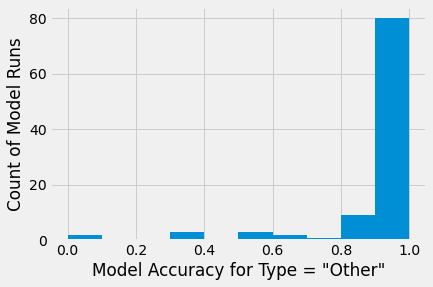

In [81]:
# Sort ascending by type Other accuracy
plt.hist(model_statistics_df["type Other Accuracy"])
plt.xlabel('Model Accuracy for Type = "Other"')
plt.ylabel('Count of Model Runs')
plt.show()

In [82]:
######################################################################
# EXPORT THE DATAFRAME AS A CSV FILE
######################################################################

#model_statistics_df.to_csv(r'Data/multi-run_classification_statistics.csv', index = False)